In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  


In [9]:
hosp_data = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7',sep=';')
hosp_data.head()

dep  sexe        jour  hosp  rea  HospConv  SSR_USLD  autres  rad  dc
0  01     0  2020-03-18     2    0       NaN       NaN     NaN    1   0
1  01     1  2020-03-18     1    0       NaN       NaN     NaN    1   0
2  01     2  2020-03-18     1    0       NaN       NaN     NaN    0   0
3  02     0  2020-03-18    41   10       NaN       NaN     NaN   18  11
4  02     1  2020-03-18    19    4       NaN       NaN     NaN   11   6

In [10]:
#UNGENDER
hosp_data = hosp_data[['dep','sexe','jour','hosp','rea','rad','dc']]
hosp_data.head(40)
hosp_data_ungendered = hosp_data.groupby(hosp_data.index // 3).sum()
hosp_data_ungendered['jour'] = hosp_data['jour'].groupby(hosp_data.index // 3).last()
hosp_data_ungendered['dep'] = hosp_data['dep'].groupby(hosp_data.index // 3).last()
hosp_data_ungendered = hosp_data_ungendered.drop(columns='sexe')
hosp_data_ungendered

#hosp_data.groupby(['dep_code']).sum()

hosp  rea   rad   dc        jour  dep
0         4    0     2    0  2020-03-18   01
1        82   20    36   22  2020-03-18   02
2         8    0     2    0  2020-03-18   03
3         6    2     4    0  2020-03-18   04
4        16    2    18    0  2020-03-18   05
...     ...  ...   ...  ...         ...  ...
47364   184   34  2977  610  2021-06-29  971
47365    36   10  1636  196  2021-06-29  972
47366   244   76  5960  278  2021-06-29  973
47367   292   64  4024  488  2021-06-29  974
47368     2    0  2523  261  2021-06-29  976

[47369 rows x 6 columns]

In [11]:
#dep2 = recodage des 101 départements [OPTIONEL]
#a = list(np.arange(101)+1)
#from itertools import cycle, islice
#hosp_data_ungendered['dep2'] = list(islice(cycle(a), len(hosp_data_ungendered)))

#hosp_data_ungendered[15:]

In [12]:
#Sort du df par départements et par jours
hosp_data_ungendered = hosp_data_ungendered.sort_values(by=['dep','jour'],ignore_index=True)
hosp_data_ungendered

hosp  rea   rad   dc        jour  dep
0         4    0     2    0  2020-03-18   01
1         4    0     2    0  2020-03-19   01
2         4    0     2    0  2020-03-20   01
3         8    0     2    0  2020-03-21   01
4        16    2     4    0  2020-03-22   01
...     ...  ...   ...  ...         ...  ...
47364     4    0  2523  261  2021-06-25  976
47365     4    0  2523  261  2021-06-26  976
47366     2    0  2523  261  2021-06-27  976
47367     2    0  2523  261  2021-06-28  976
47368     2    0  2523  261  2021-06-29  976

[47369 rows x 6 columns]

In [13]:
hosp_data_ungendered

hosp  rea   rad   dc        jour  dep
0         4    0     2    0  2020-03-18   01
1         4    0     2    0  2020-03-19   01
2         4    0     2    0  2020-03-20   01
3         8    0     2    0  2020-03-21   01
4        16    2     4    0  2020-03-22   01
...     ...  ...   ...  ...         ...  ...
47364     4    0  2523  261  2021-06-25  976
47365     4    0  2523  261  2021-06-26  976
47366     2    0  2523  261  2021-06-27  976
47367     2    0  2523  261  2021-06-28  976
47368     2    0  2523  261  2021-06-29  976

[47369 rows x 6 columns]

In [14]:
#Lissage des données en hebdomadaire avec rolling mean
hosp_week_mean = hosp_data_ungendered.groupby(np.arange(len(hosp_data_ungendered))//7).mean().round(0)
hosp_week_mean['dep'] = hosp_data_ungendered['dep'].groupby(hosp_data_ungendered.index // 7).first()
hosp_week_mean['jour'] = hosp_data_ungendered['jour'].groupby(hosp_data_ungendered.index // 7).last()
#hosp_week_mean = hosp_week_mean.set_index(['dep','jour'])
hosp_week_mean

hosp   rea     rad     dc  dep        jour
0      16.0   2.0     7.0    0.0   01  2020-03-24
1     101.0  23.0    42.0    9.0   01  2020-03-31
2     212.0  61.0   149.0   40.0   01  2020-04-07
3     244.0  59.0   249.0   80.0   01  2020-04-14
4     318.0  46.0   355.0  115.0   01  2020-04-21
...     ...   ...     ...    ...  ...         ...
6762   14.0   6.0  2502.0  258.0  976  2021-06-01
6763   15.0   8.0  2505.0  259.0  976  2021-06-08
6764   12.0   7.0  2513.0  259.0  976  2021-06-15
6765    8.0   3.0  2521.0  260.0  976  2021-06-22
6766    3.0   0.0  2524.0  261.0  976  2021-06-29

[6767 rows x 6 columns]

In [15]:
#Import des données de population par département de l'insee
pop = pd.read_excel('https://www.insee.fr/fr/statistiques/fichier/1893198/estim-pop-dep-sexe-gca-1975-2021.xlsx', sheet_name='2021',header=4, usecols='A,H')
pop2 = pop.copy()

<ipython-input-15-8499b859fa72>:2: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  pop = pd.read_excel('https://www.insee.fr/fr/statistiques/fichier/1893198/estim-pop-dep-sexe-gca-1975-2021.xlsx', sheet_name='2021',header=4, usecols='A,H')


In [16]:
pop = pop2

In [17]:
#Ajouter les données de population
pop = pop.rename(columns={"Total": "population","Unnamed: 0": "dep"})
pop = pop.drop([96,102,103,104,105])
df_m = hosp_week_mean.merge(pop,on='dep')
 
#Fix pour importer les DOM TOM correctement
options=['971','972','973','974','976']
domtom = hosp_week_mean[hosp_week_mean['dep'].isin(options)]
pop_dt = pop[96:101]
domtom = domtom.astype({"dep": int})
pop_dt = pop_dt.astype({"dep": int})
dt_merged = domtom.merge(pop_dt,on='dep')
 
#Final population
df_merged_1 = df_m.append(dt_merged)

In [19]:
#Ajouter les données de nombre de lits
beds = pd.read_excel('./lits_rea_2019.xlsx',sheet_name='Lits_2013_2018_2019')
beds = beds.rename(columns={"Code": "dep"})
df_m2 = hosp_week_mean.merge(beds,on='dep')
 
#Fix pour importer les DOM TOM correctement
beds_dt = beds[96:101]
beds_dt = beds_dt.astype({"dep": int})
dt_merged_2 = domtom.merge(beds_dt,on='dep')
 
#Final lits
df_merged_2 = df_m2.append(dt_merged_2)
df_merged_2 = df_merged_2['Beds_2019']

<ipython-input-19-95eb6c14c0ba>:2: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  beds = pd.read_excel('./lits_rea_2019.xlsx',sheet_name='Lits_2013_2018_2019')


In [45]:
#Final merge
#df_final = pd.concat([df_merged_1,df_merged_2], axis=1)
#df_final = df_merged_1.join(df_merged_2['Beds_2019'])
df_final = pd.concat([df_merged_1, df_merged_2], axis=1)
df_final = df_final.set_index(['dep'])
df_final

hosp   rea     rad     dc        jour  population  Beds_2019
dep                                                               
01    16.0   2.0     7.0    0.0  2020-03-24    662244.0         62
01   101.0  23.0    42.0    9.0  2020-03-31    662244.0         62
01   212.0  61.0   149.0   40.0  2020-04-07    662244.0         62
01   244.0  59.0   249.0   80.0  2020-04-14    662244.0         62
01   318.0  46.0   355.0  115.0  2020-04-21    662244.0         62
..     ...   ...     ...    ...         ...         ...        ...
976   14.0   6.0  2502.0  258.0  2021-06-01    288926.0         20
976   15.0   8.0  2505.0  259.0  2021-06-08    288926.0         20
976   12.0   7.0  2513.0  259.0  2021-06-15    288926.0         20
976    8.0   3.0  2521.0  260.0  2021-06-22    288926.0         20
976    3.0   0.0  2524.0  261.0  2021-06-29    288926.0         20

[6767 rows x 7 columns]

 A partir de ces données vous devez avoir une réflexion sur l'évolutionjournalière relative
    * A l'incidence par région ou par département, 
    * Les taux d'occupation hospitalier / rea . par région / département (même si ces indicateurs sont biaisés)
    * Les ratios dc/ hospitalisation , dc/rea, rea/ hospitalisation

In [46]:
#Calcul des taux d'incidence par département (nouveaux cas * 100 000 / population totale)
df_final['taux_incidence'] = (df_final.hosp * 100000) / df_final.population
#Calcul du taux d'occupation hospitalier par département 
df_final['occupation_lits'] = (100*df_final.rea)/df_final.Beds_2019
#Calcul ratios décés / hospitalisation
df_final['dc/hosp'] = df_final['dc'] / df_final['hosp']
#Calcul ratio décés / réa
df_final['dc/rea'] = df_final['dc'] / df_final['rea']
#Calcul ratio rea / hospitalisation
df_final['rea/hosp'] = df_final['rea'] / df_final['hosp']


df_final

hosp   rea     rad     dc        jour  population  Beds_2019  \
dep                                                                  
01    16.0   2.0     7.0    0.0  2020-03-24    662244.0         62   
01   101.0  23.0    42.0    9.0  2020-03-31    662244.0         62   
01   212.0  61.0   149.0   40.0  2020-04-07    662244.0         62   
01   244.0  59.0   249.0   80.0  2020-04-14    662244.0         62   
01   318.0  46.0   355.0  115.0  2020-04-21    662244.0         62   
..     ...   ...     ...    ...         ...         ...        ...   
976   14.0   6.0  2502.0  258.0  2021-06-01    288926.0         20   
976   15.0   8.0  2505.0  259.0  2021-06-08    288926.0         20   
976   12.0   7.0  2513.0  259.0  2021-06-15    288926.0         20   
976    8.0   3.0  2521.0  260.0  2021-06-22    288926.0         20   
976    3.0   0.0  2524.0  261.0  2021-06-29    288926.0         20   

     taux_incidence  occupation_lits    dc/hosp     dc/rea  rea/hosp  
dep                                                                   
01         2.416028         3.225806   0.000000   0.000000  0.125000  
01        15.251176        37.096774   0.089109   0.391304  0.227723  
01        32.012370        98.387097   0.188679   0.655738  0.287736  
01        36.844426        95.161290   0.327869   1.355932  0.241803  
01        48.018555        74.193548   0.361635   2.500000  0.144654  
..              ...              ...        ...        ...       ...  
976        4.845531        30.000000  18.428571  43.000000  0.428571  
976        5.191641        40.000000  17.266667  32.375000  0.533333  
976        4.153313        35.000000  21.583333  37.000000  0.583333  
976        2.768875        15.000000  32.500000  86.666667  0.375000  
976        1.038328         0.000000  87.000000        inf  0.000000  

[6767 rows x 12 columns]

In [47]:
df_final.to_excel("df_final.xlsx")

In [48]:
#Exemples de visualisation

In [88]:
df = pd.read_excel("df_final.xlsx")[['dep','jour', 'taux_incidence','occupation_lits', 'dc/hosp', 'dc/rea', 'rea/hosp']]
df.head()

dep        jour  taux_incidence  occupation_lits   dc/hosp    dc/rea  \
0  01  2020-03-24        2.416028         3.225806  0.000000  0.000000   
1  01  2020-03-31       15.251176        37.096774  0.089109  0.391304   
2  01  2020-04-07       32.012370        98.387097  0.188679  0.655738   
3  01  2020-04-14       36.844426        95.161290  0.327869  1.355932   
4  01  2020-04-21       48.018555        74.193548  0.361635  2.500000   

   rea/hosp  
0  0.125000  
1  0.227723  
2  0.287736  
3  0.241803  
4  0.144654

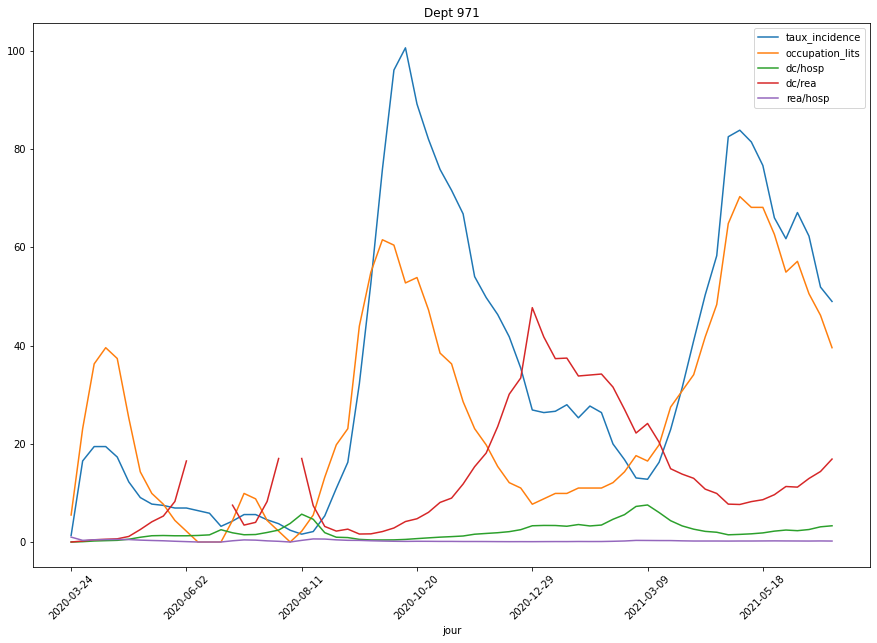

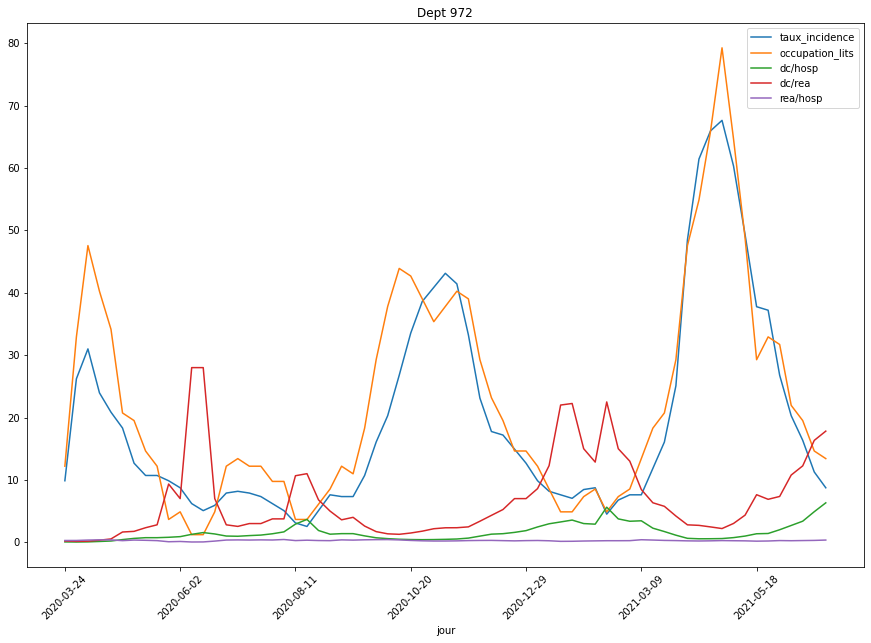

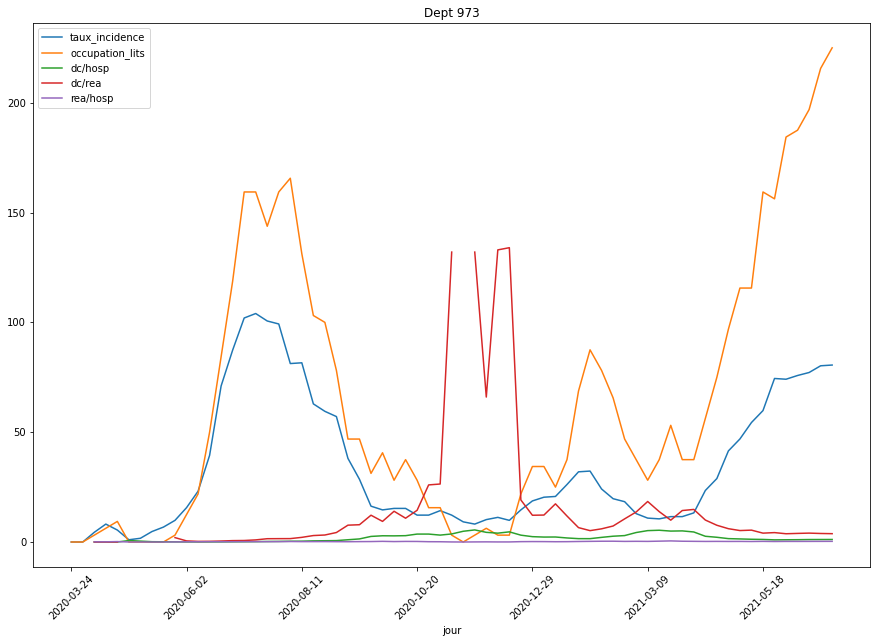

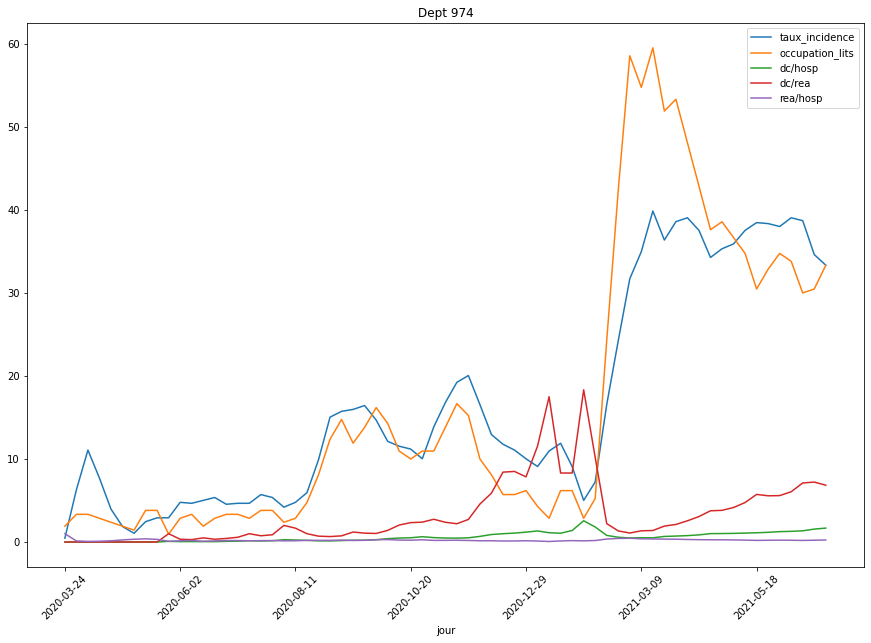

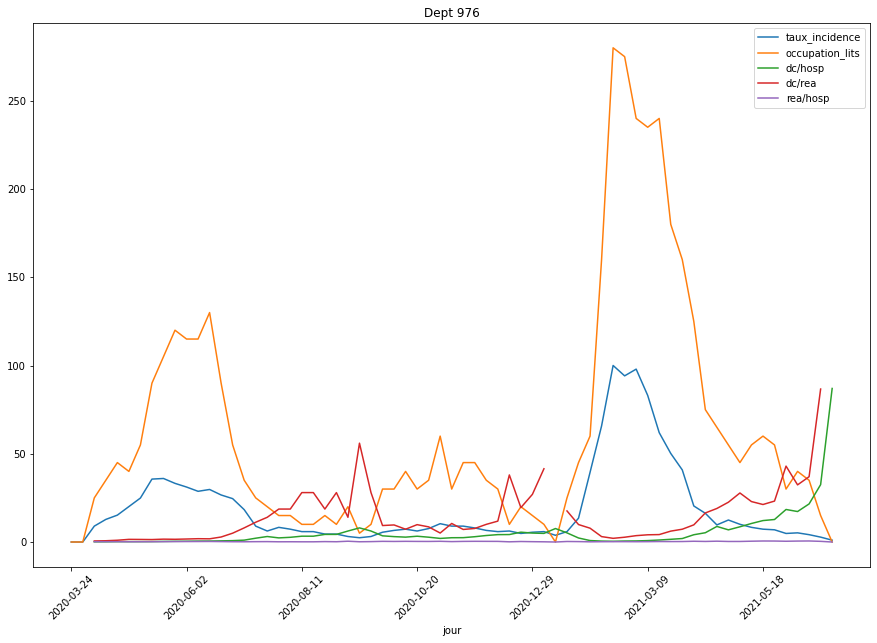

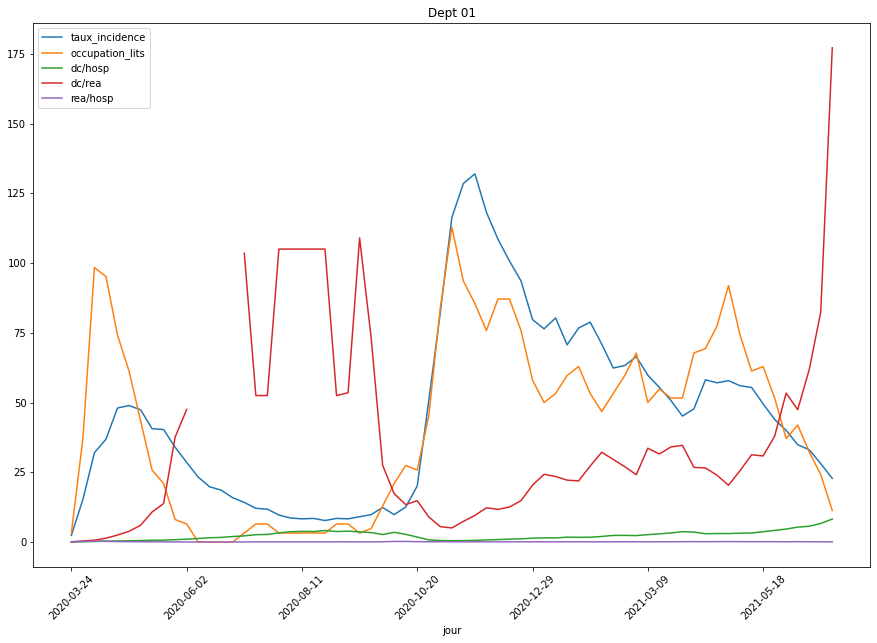

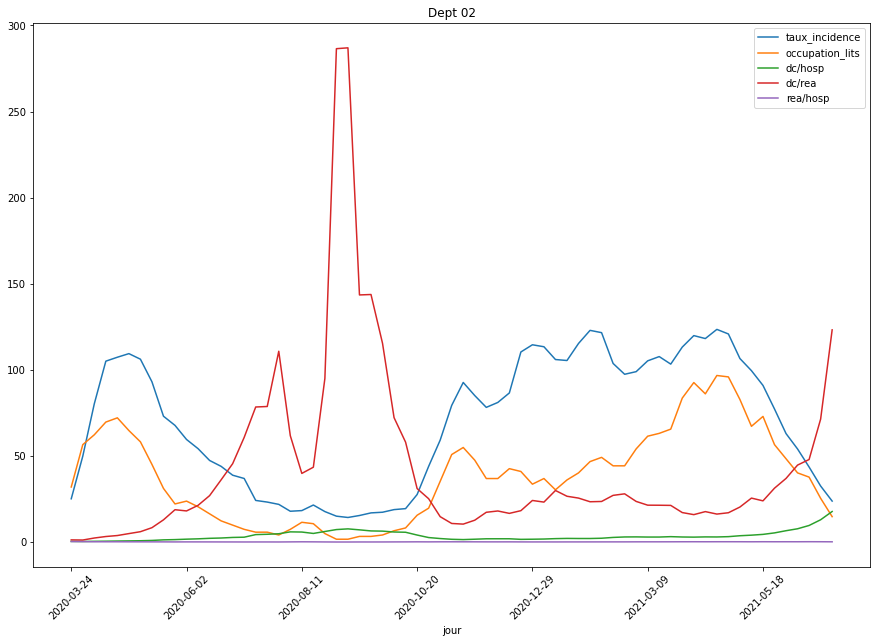

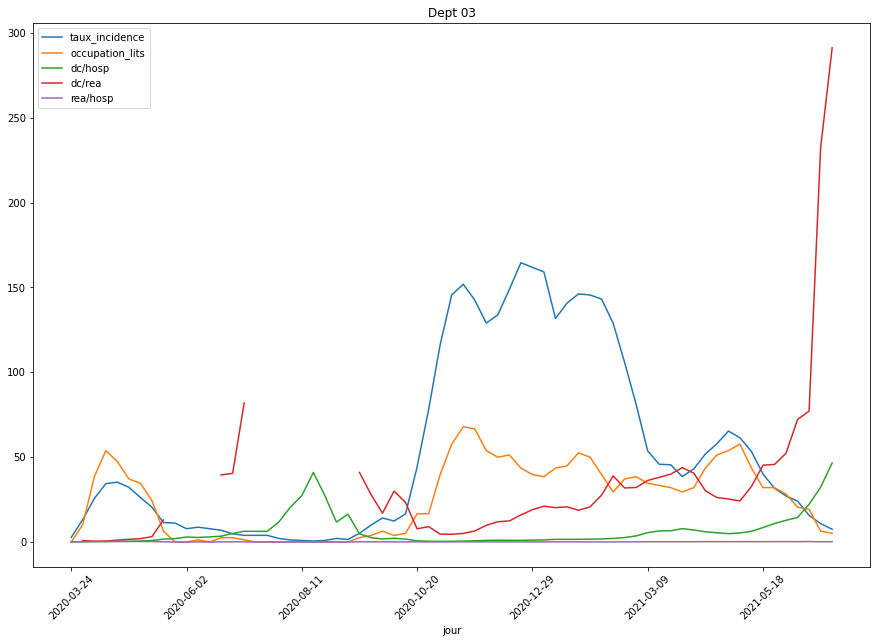

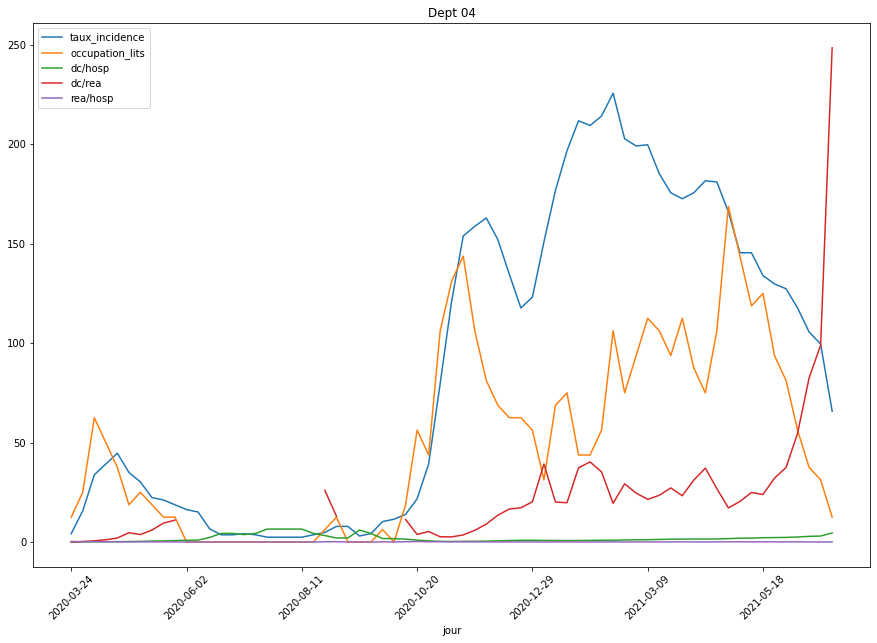

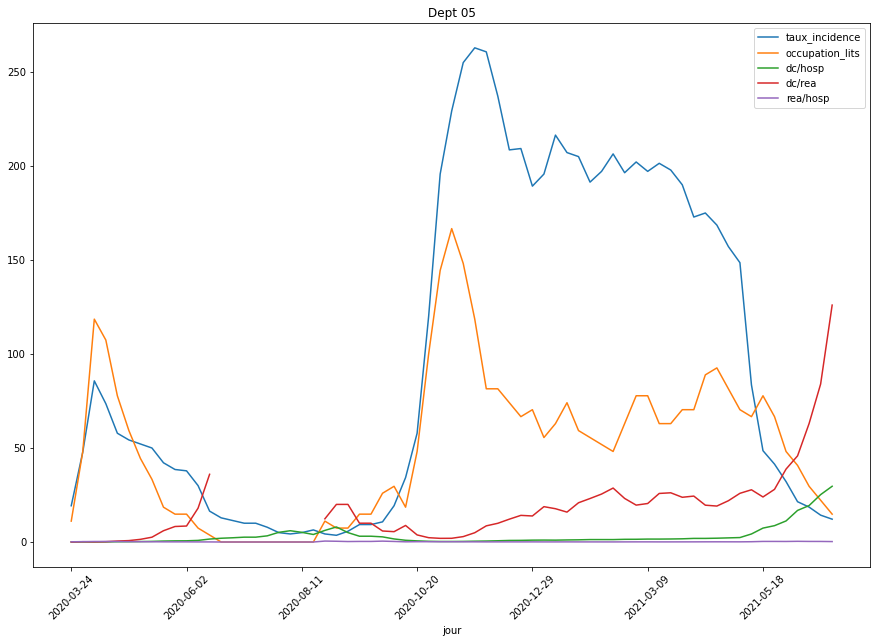

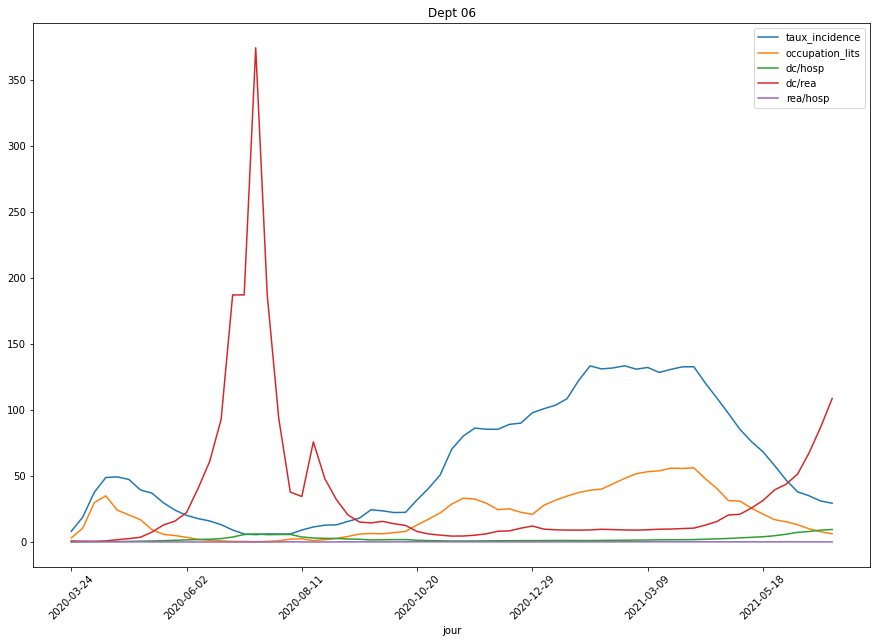

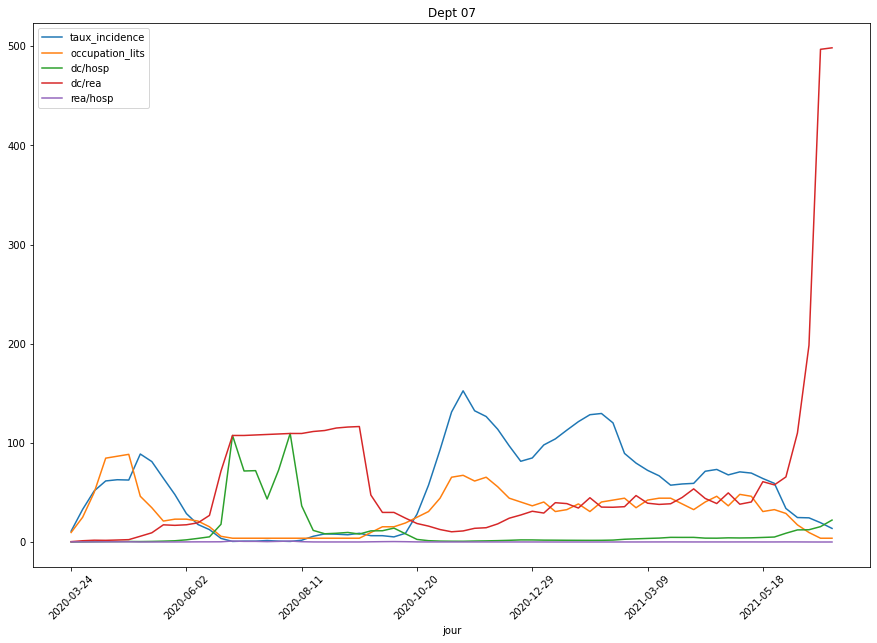

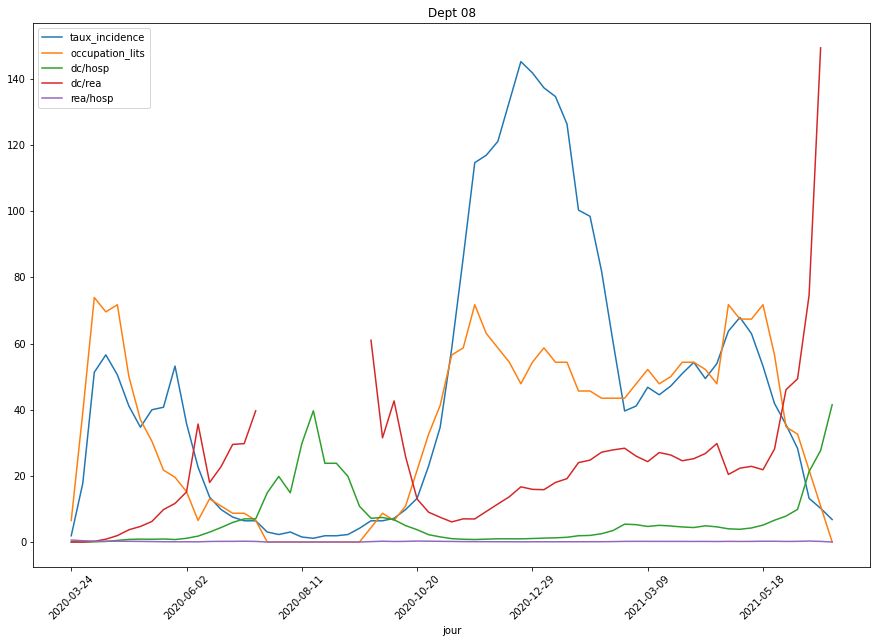

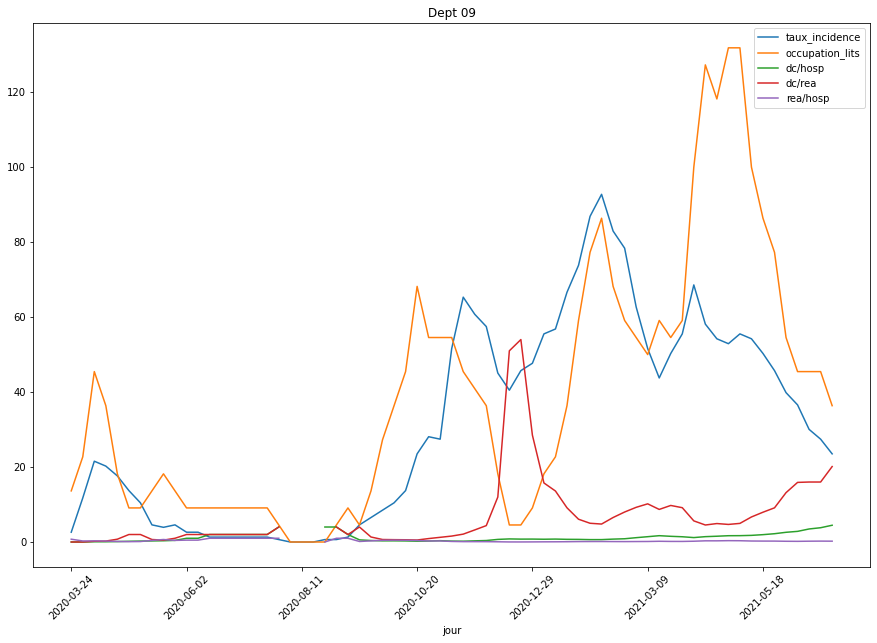

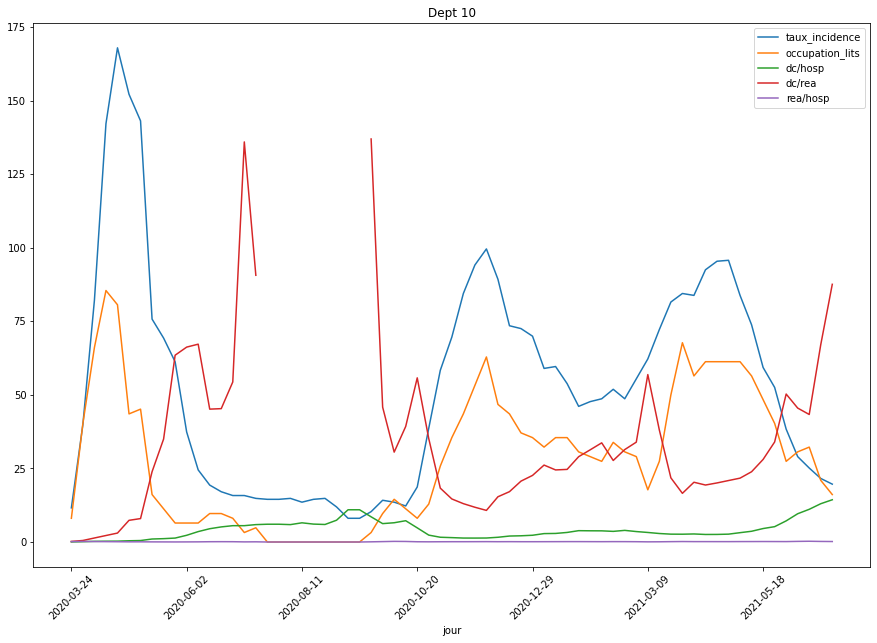

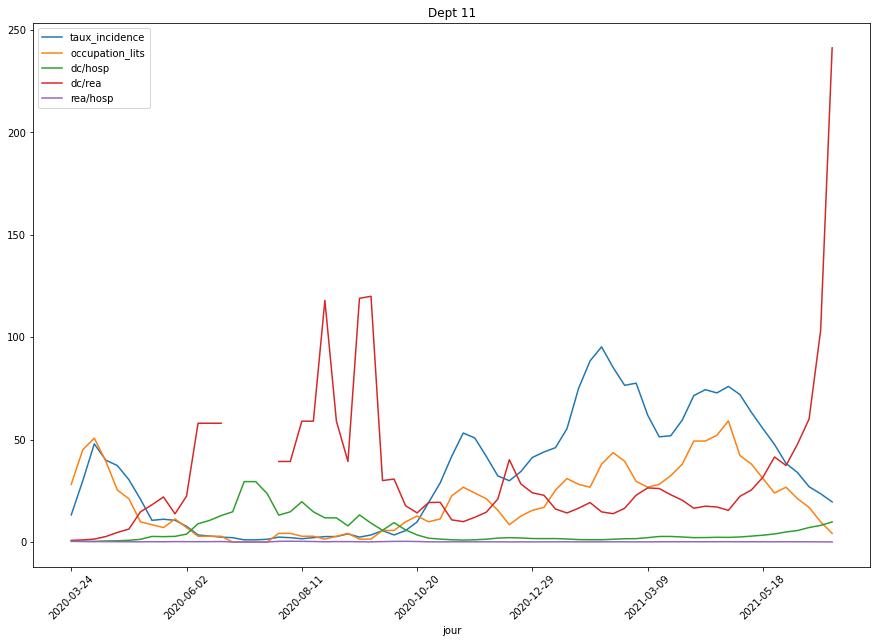

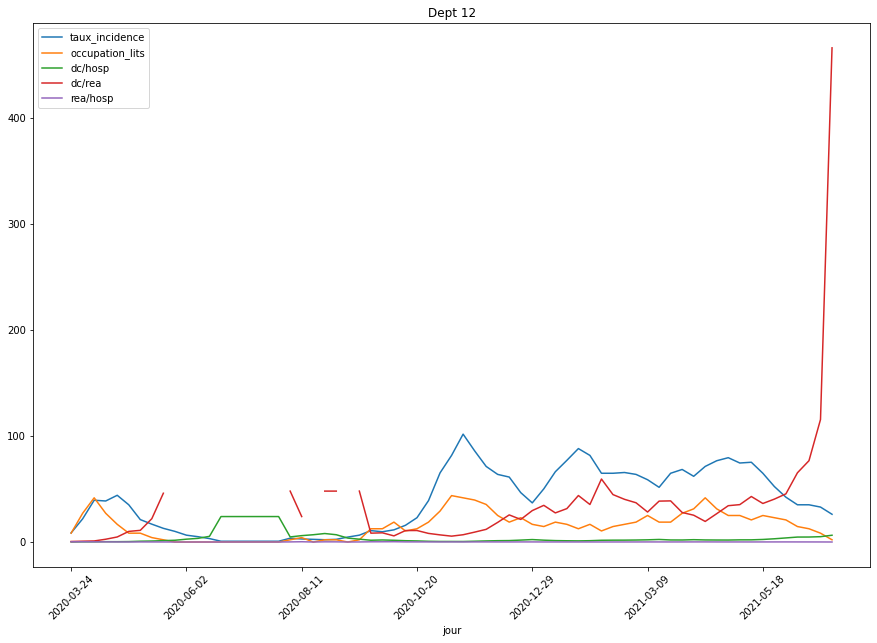

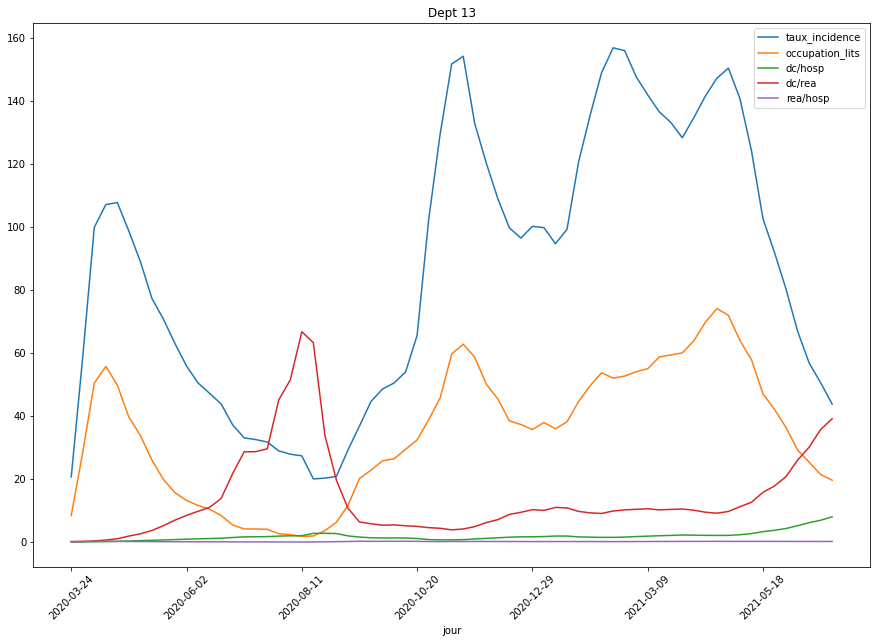

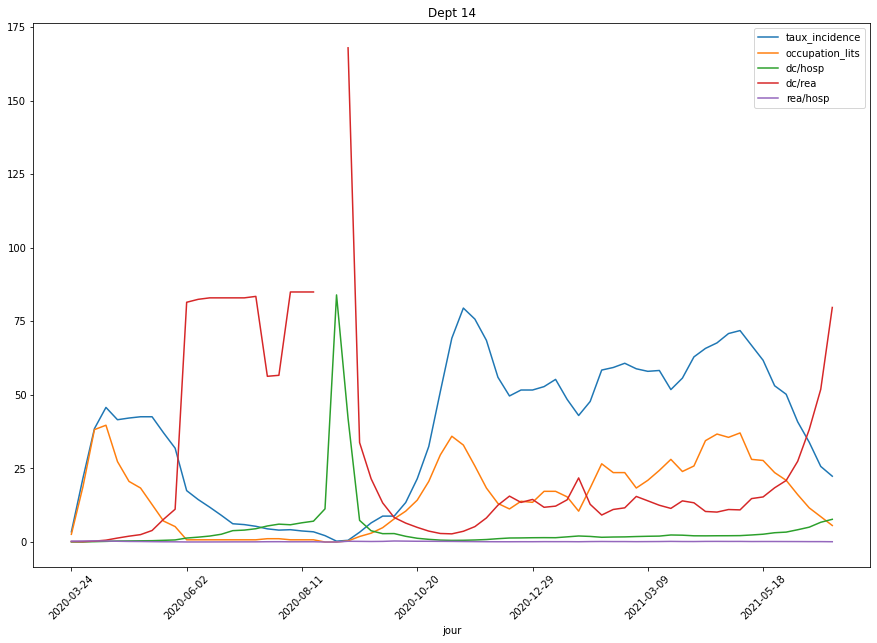

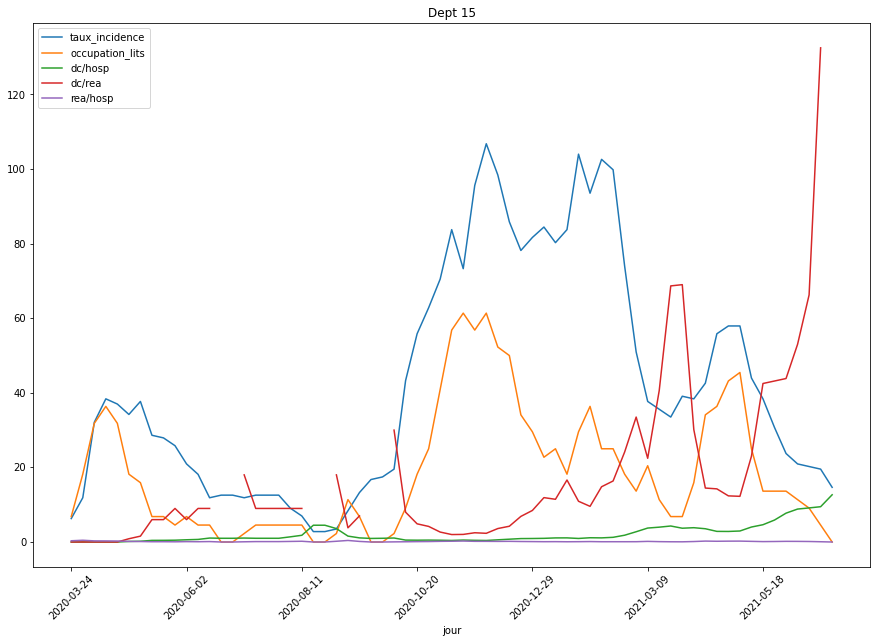

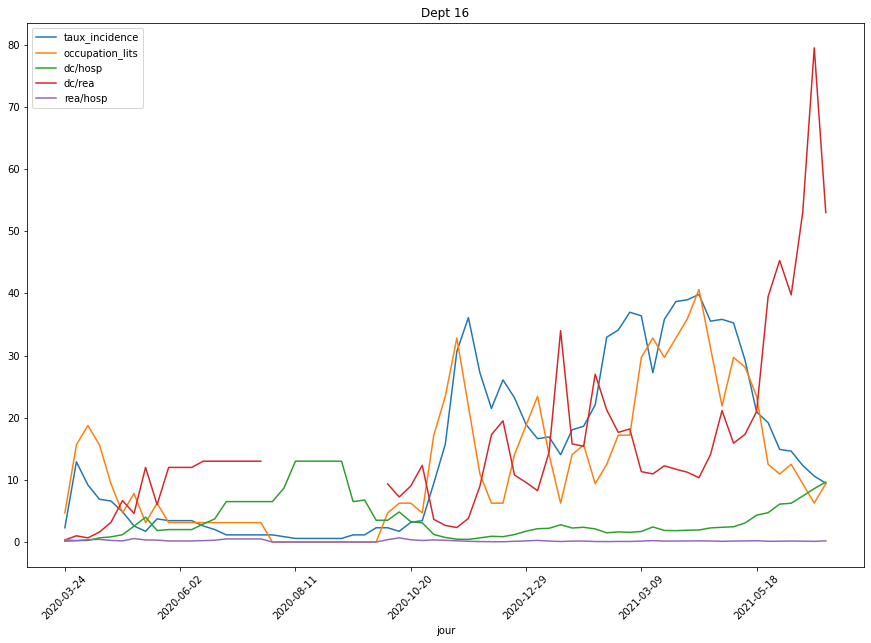

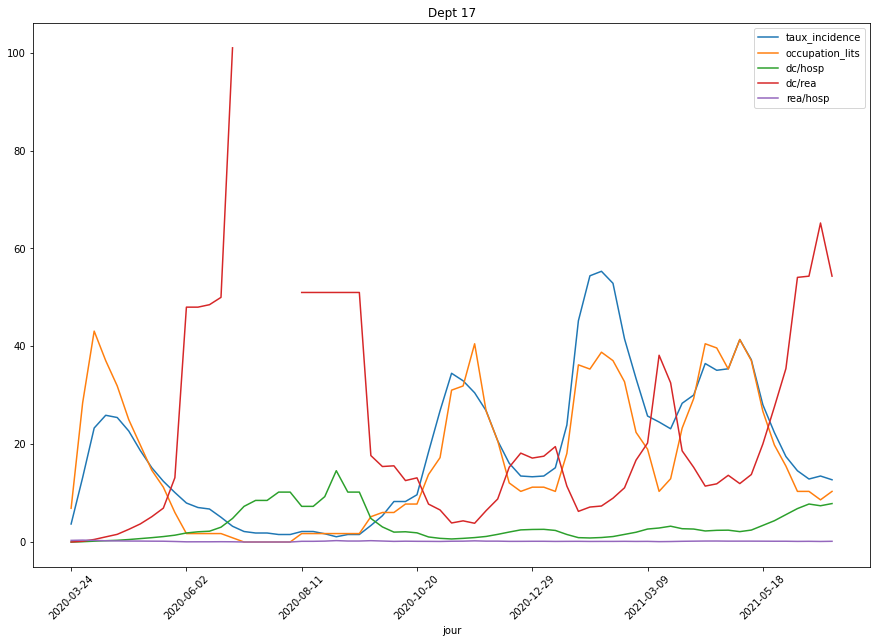

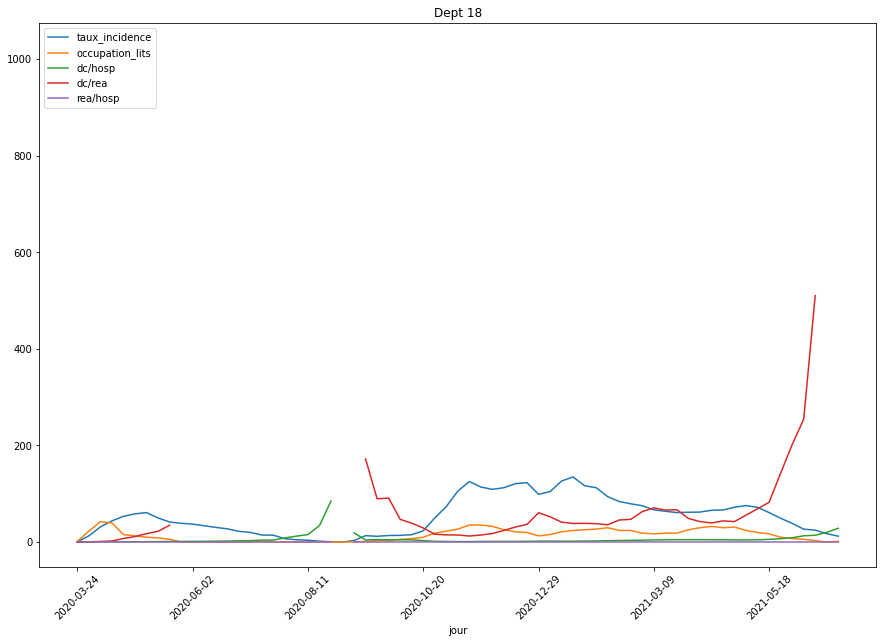

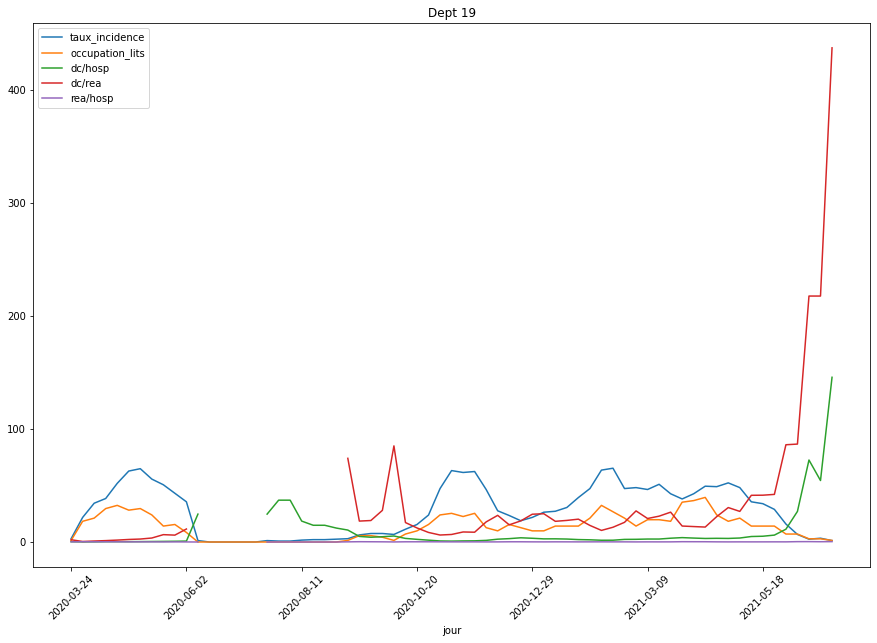

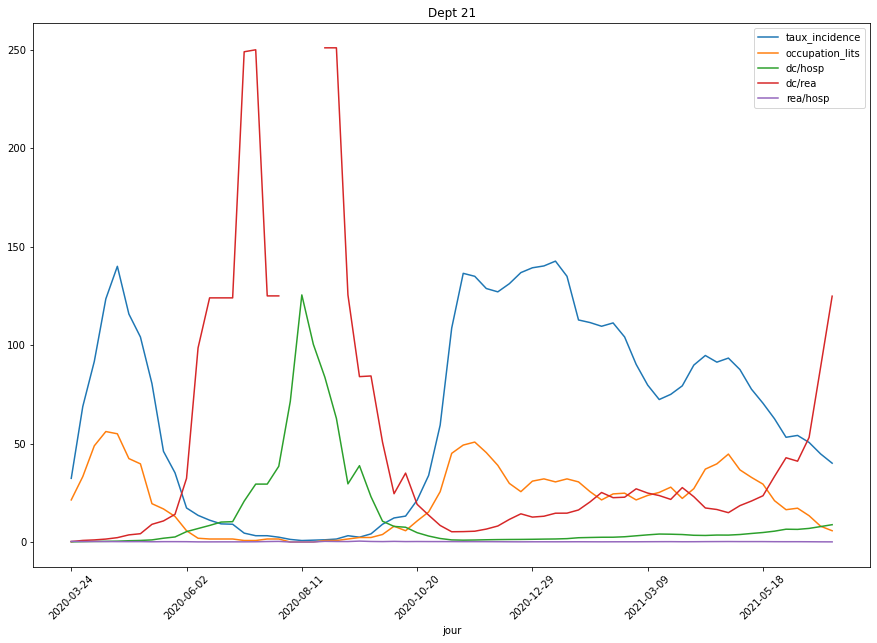

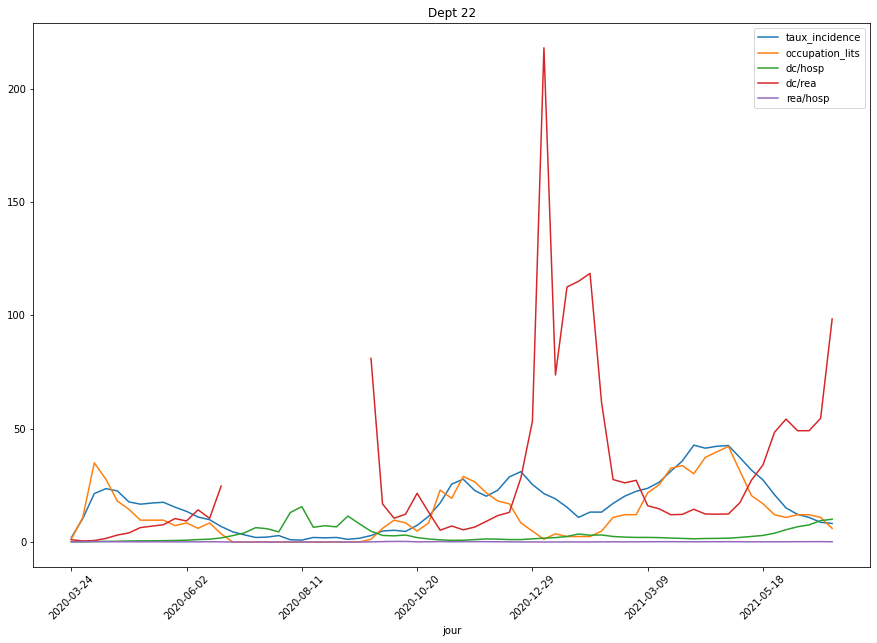

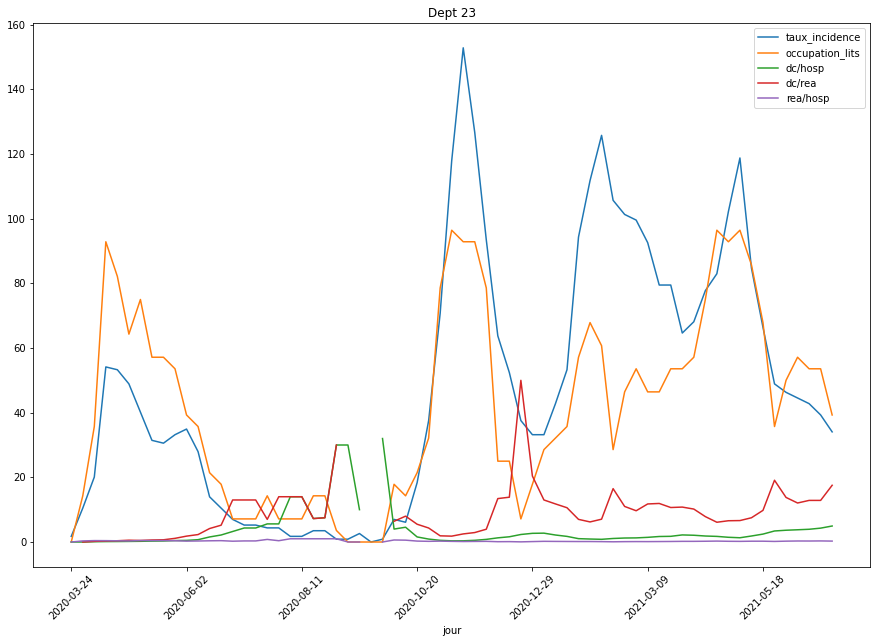

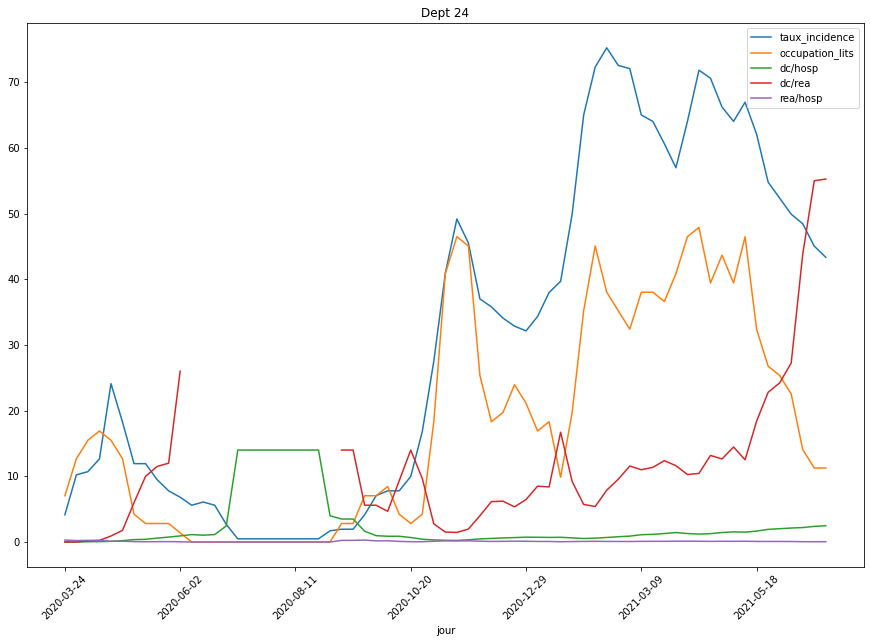

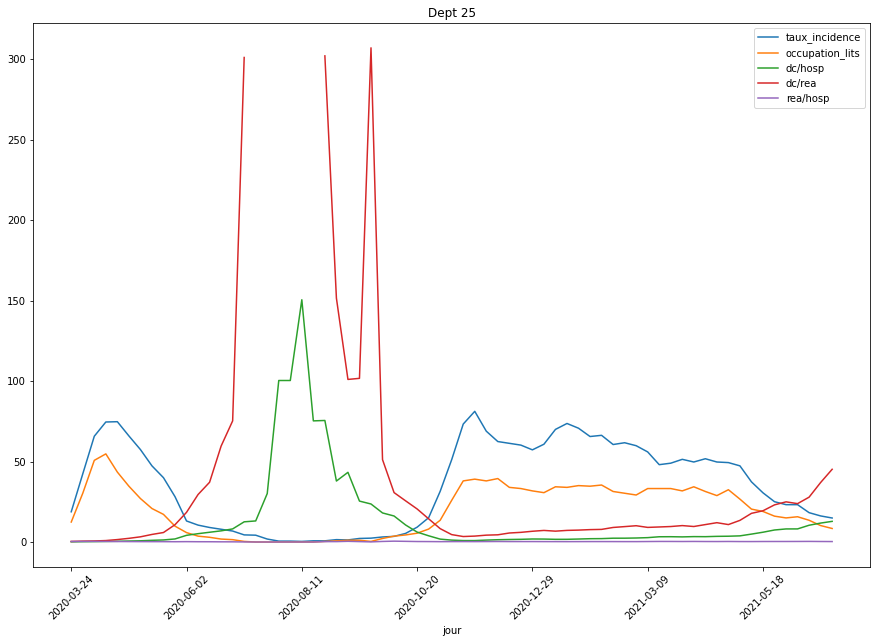

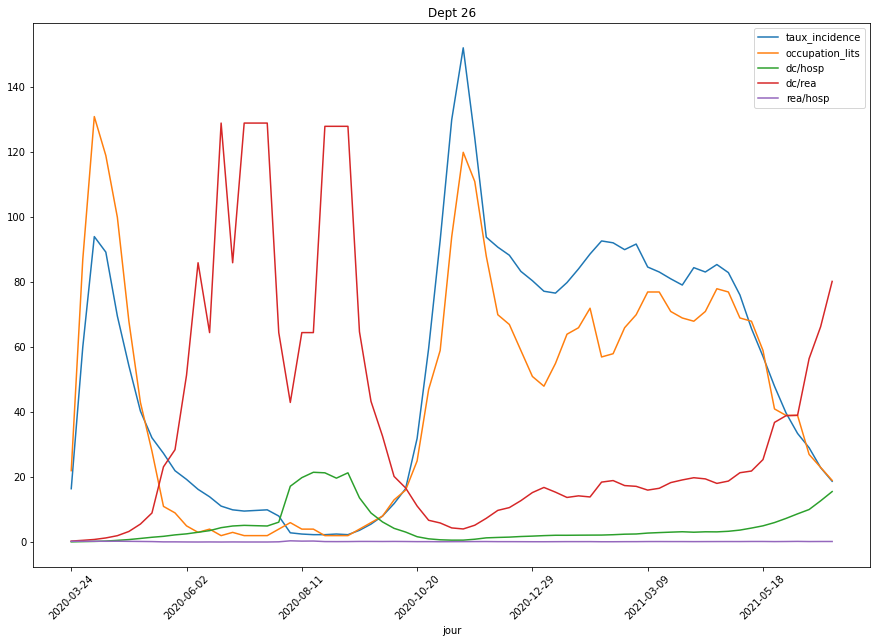

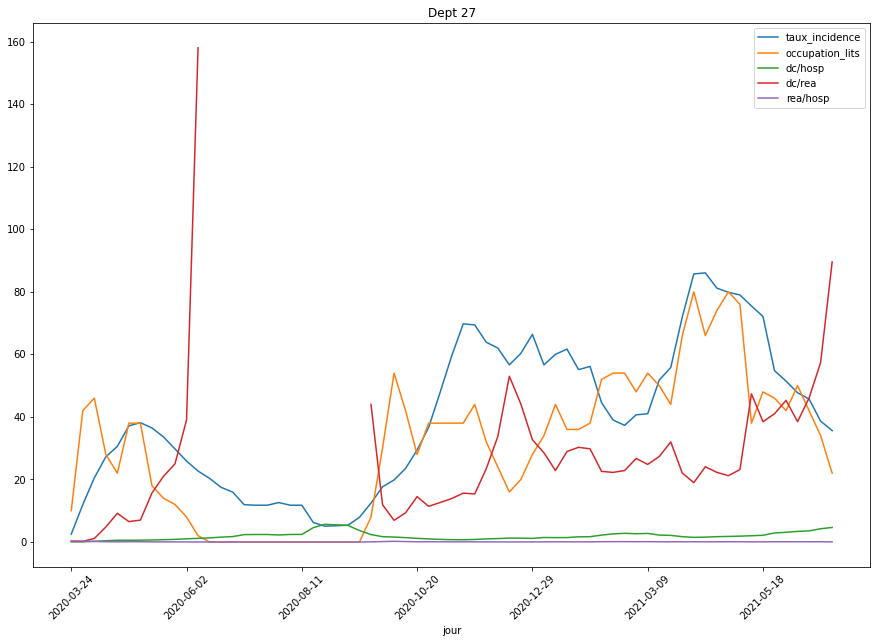

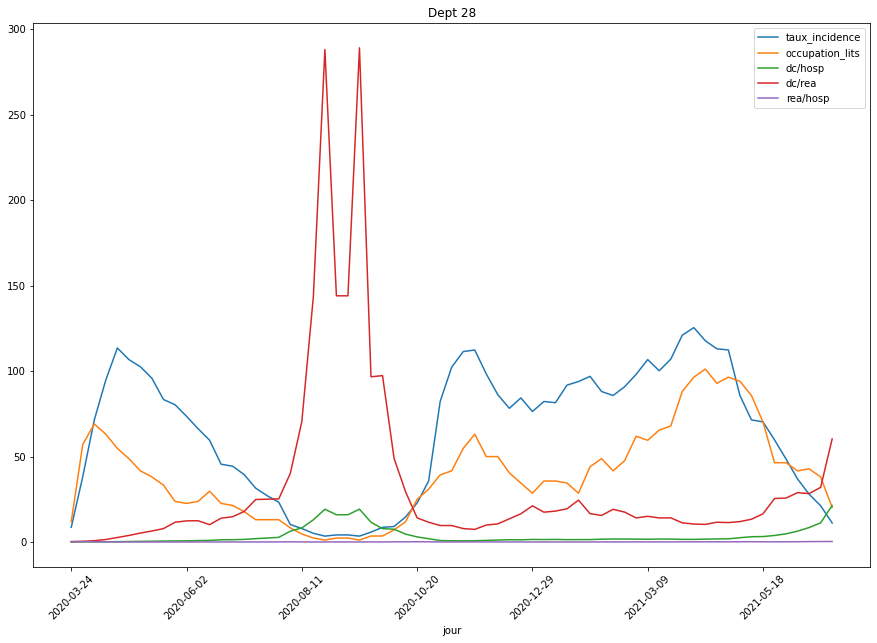

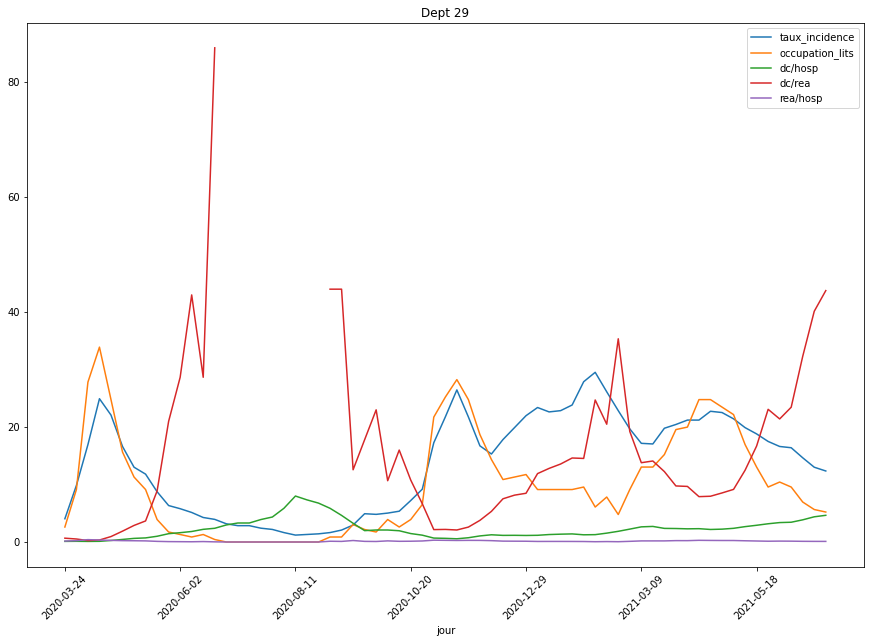

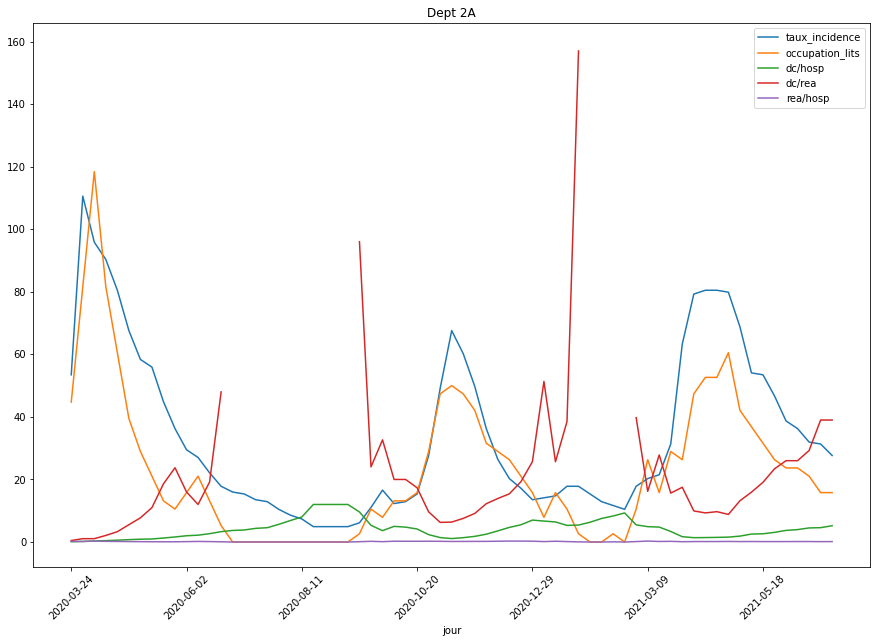

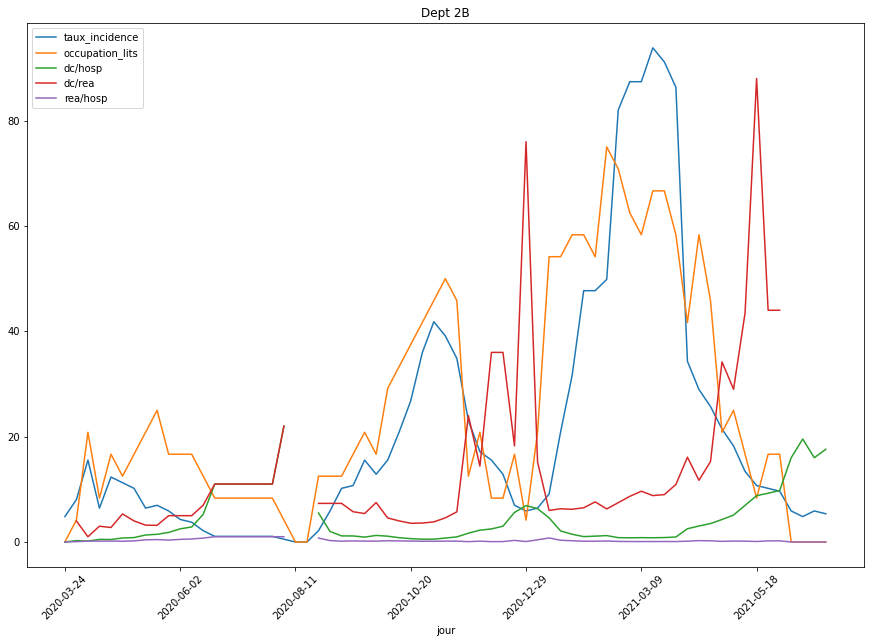

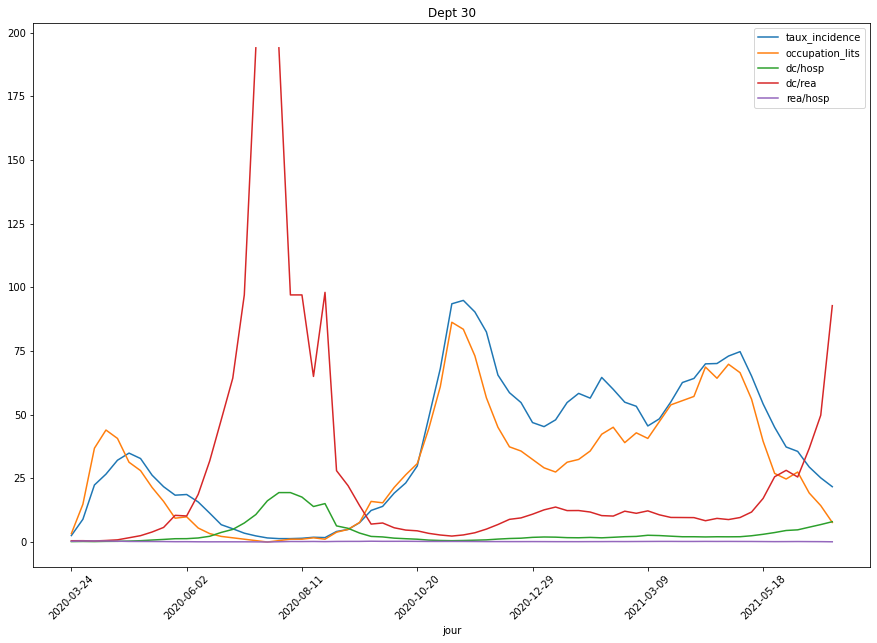

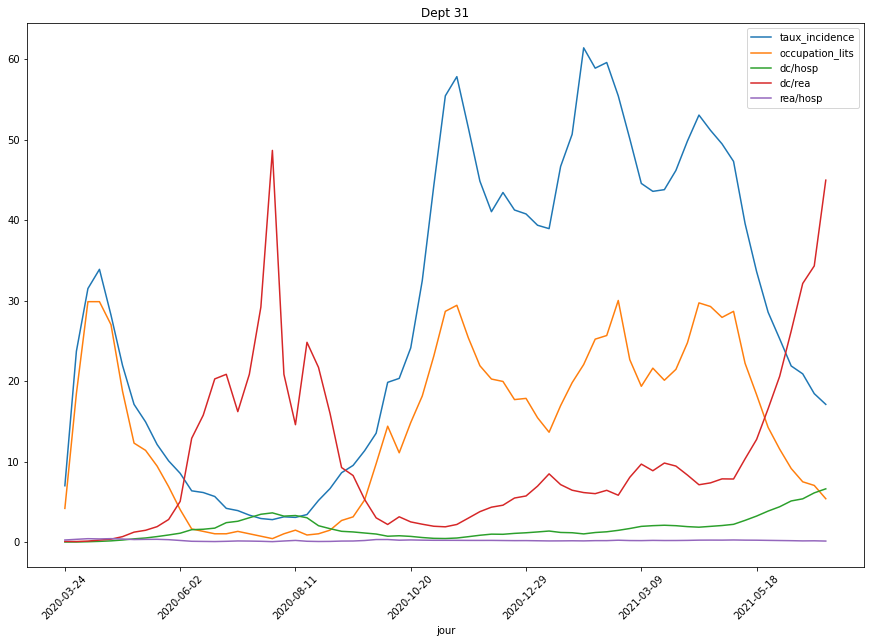

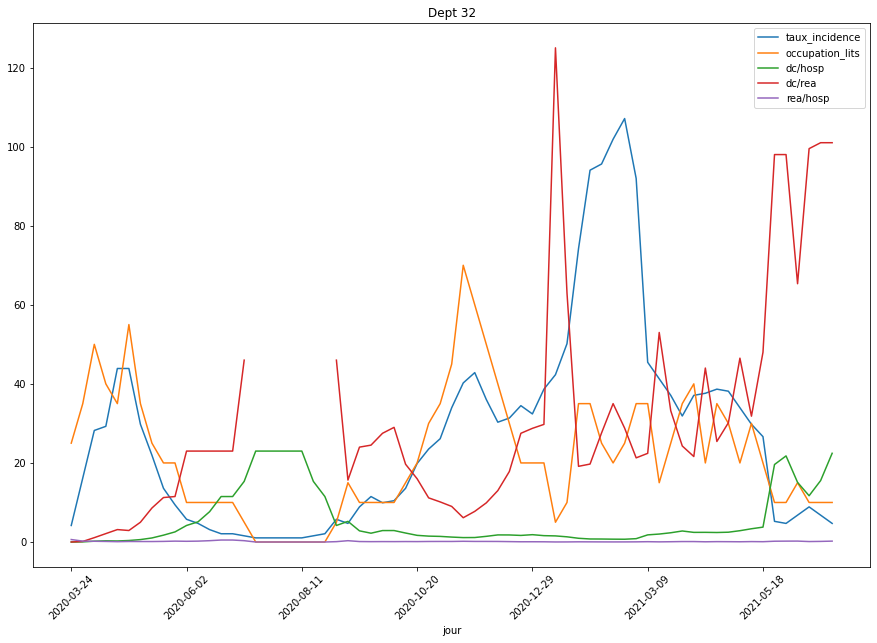

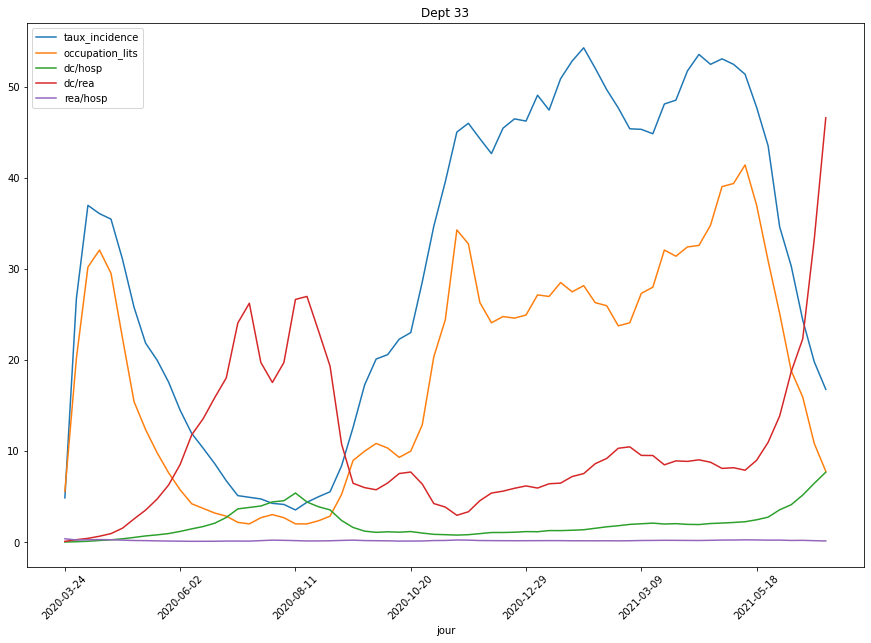

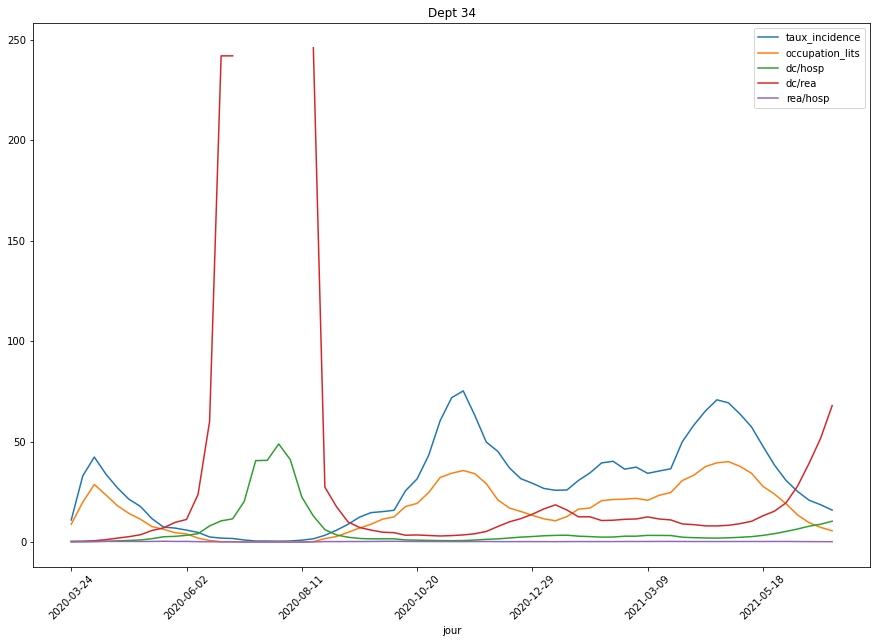

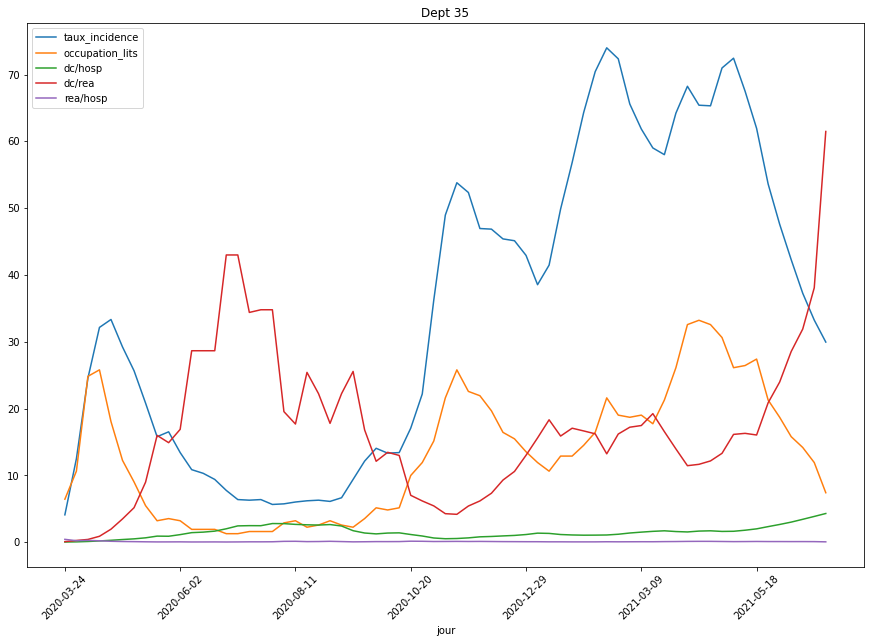

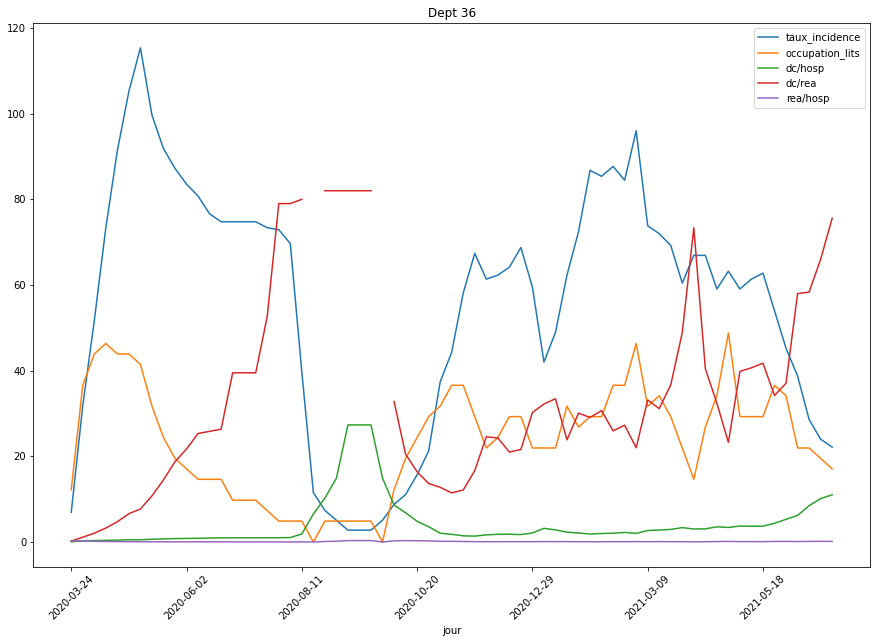

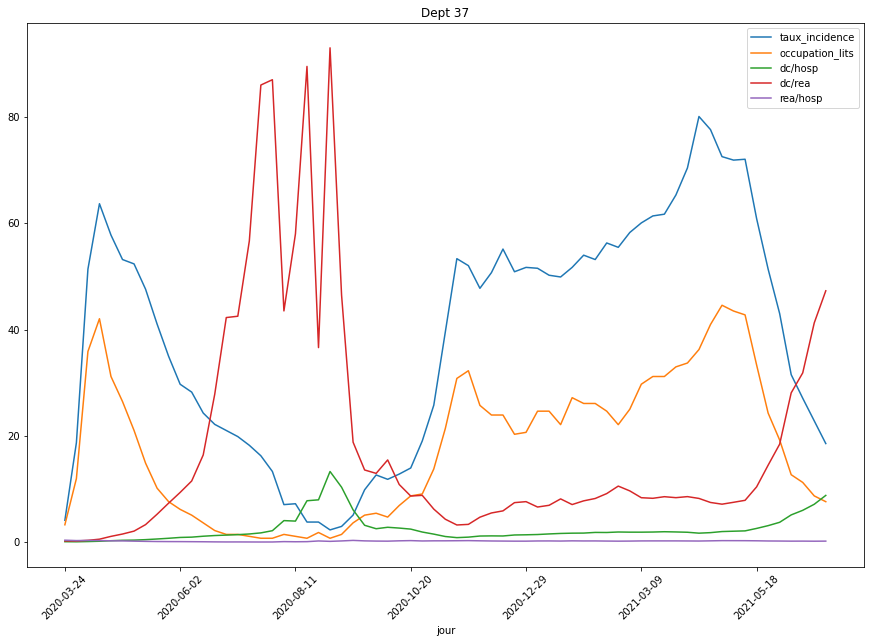

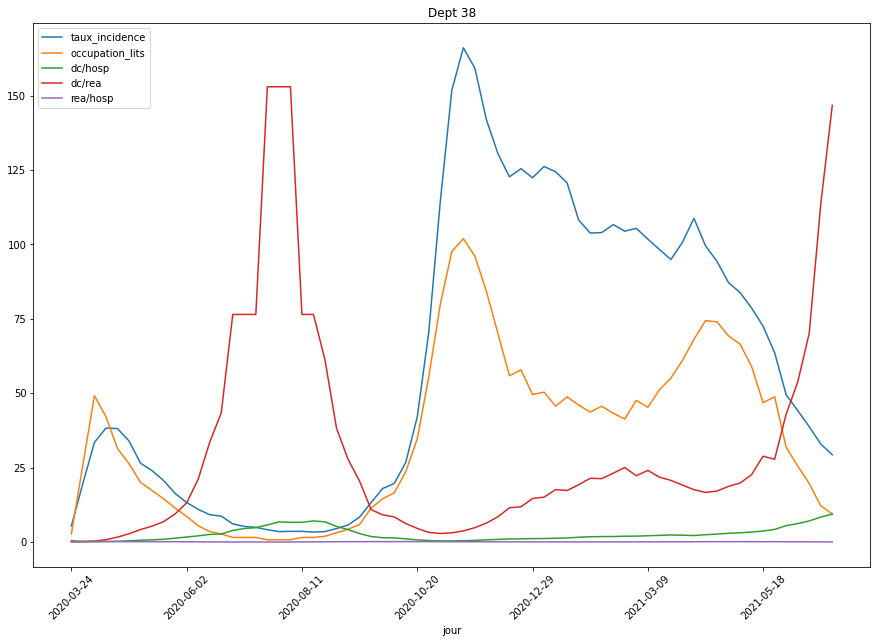

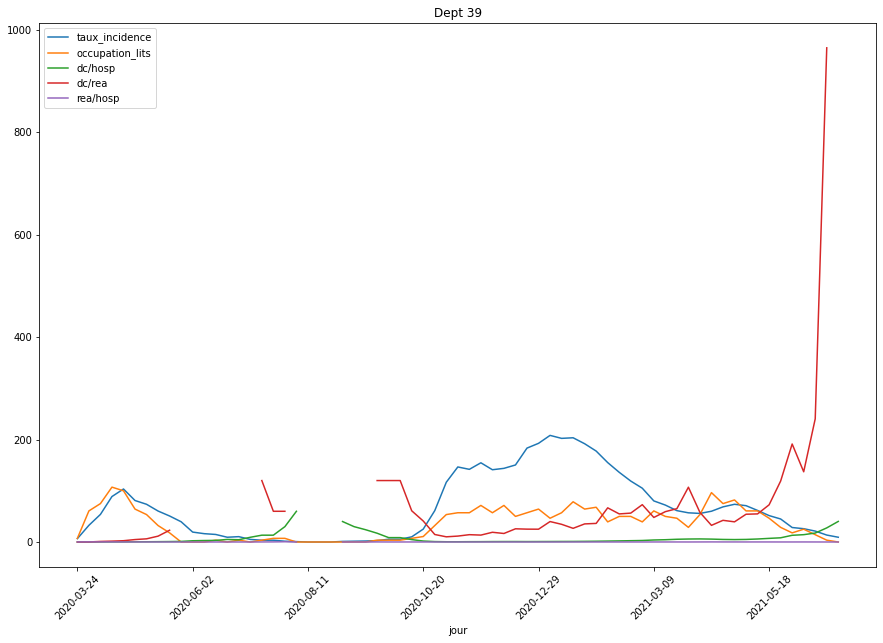

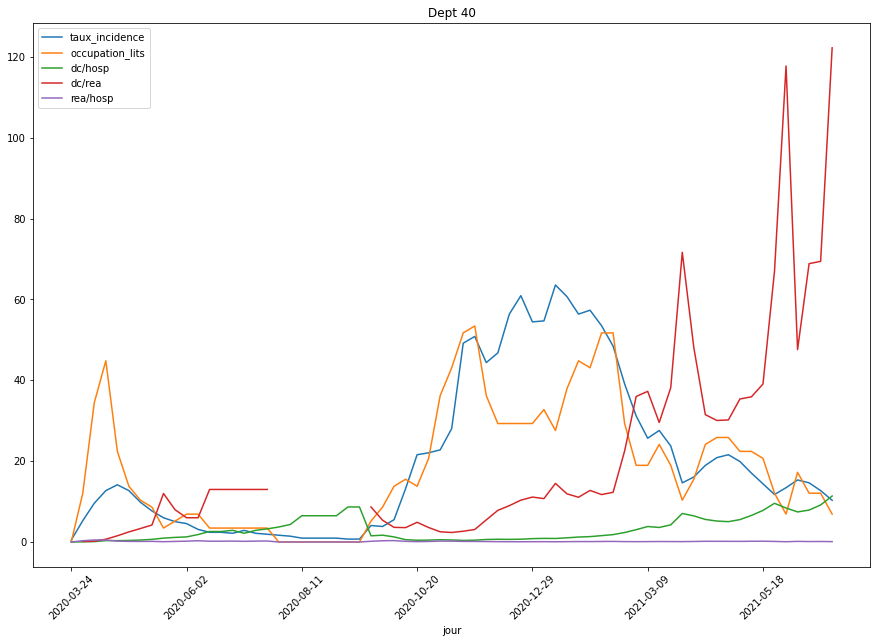

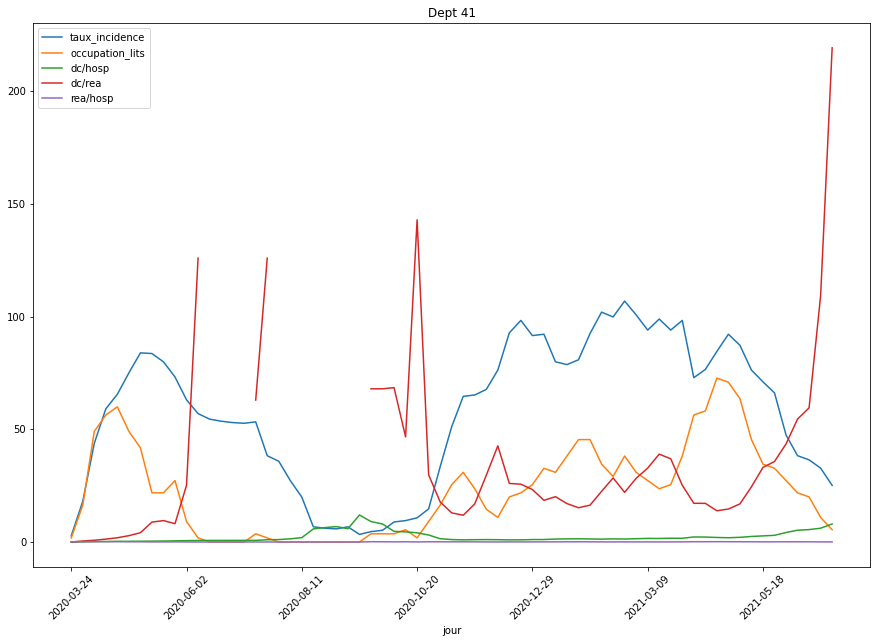

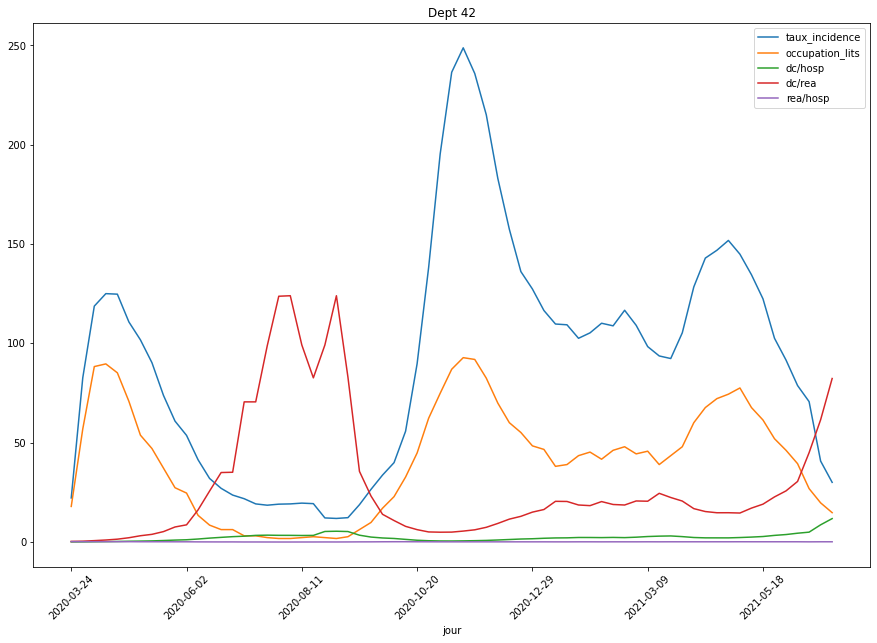

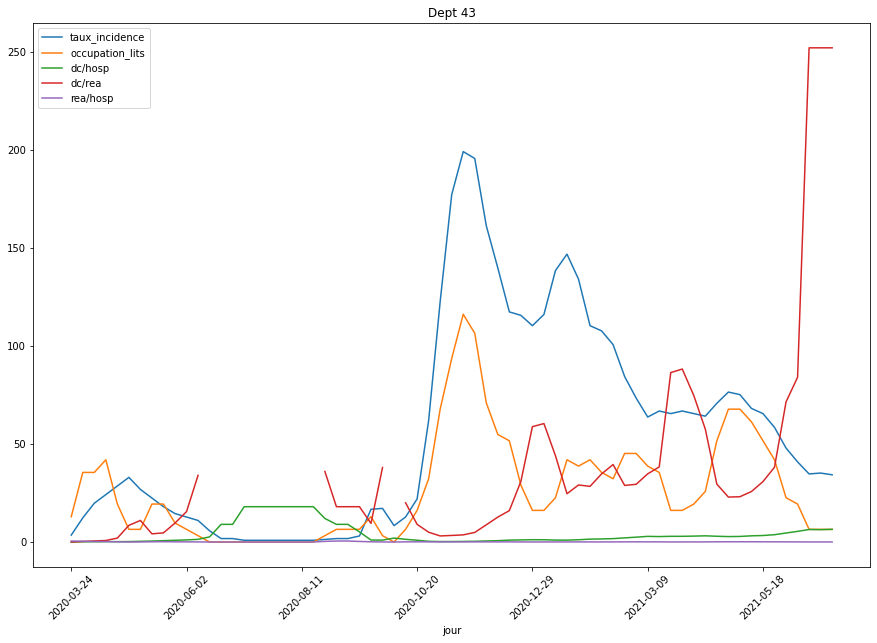

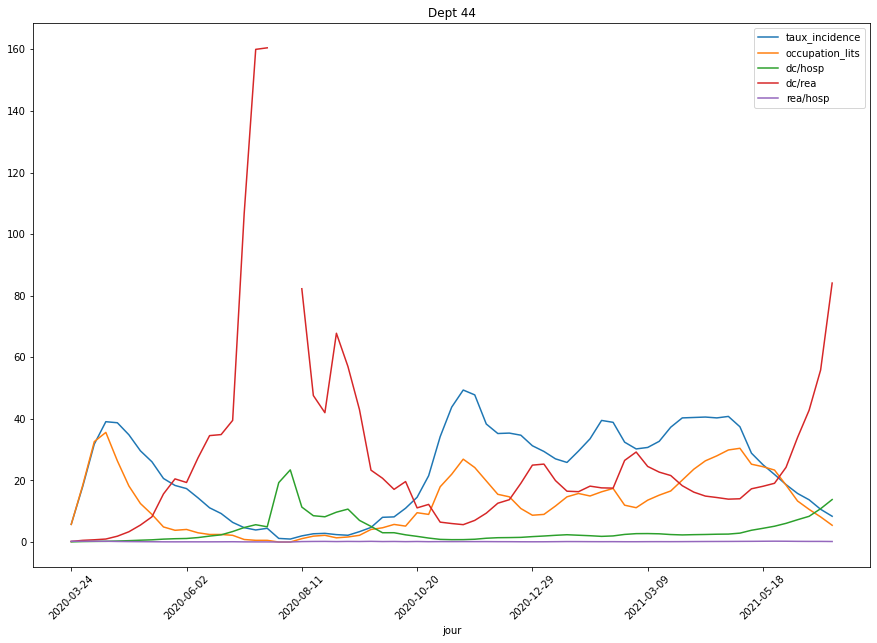

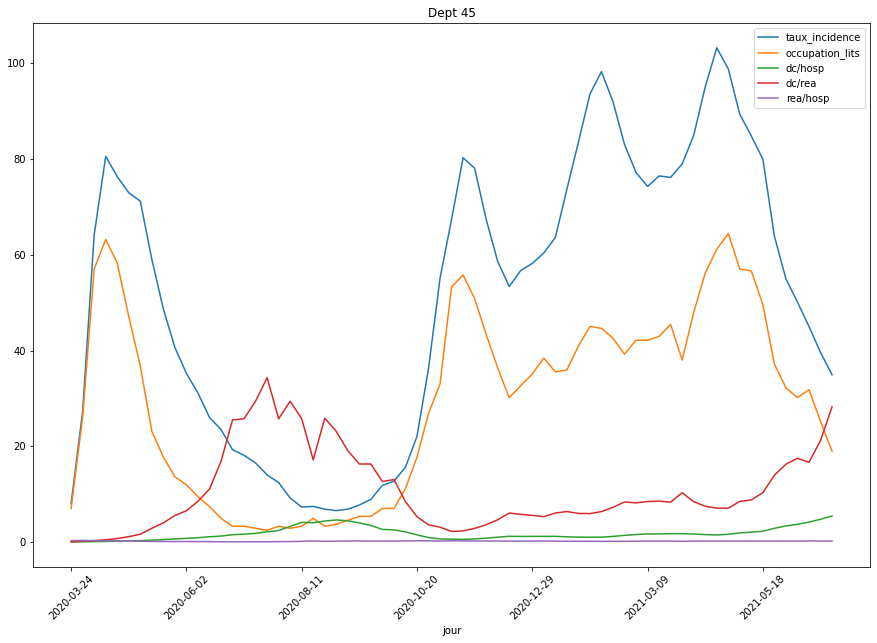

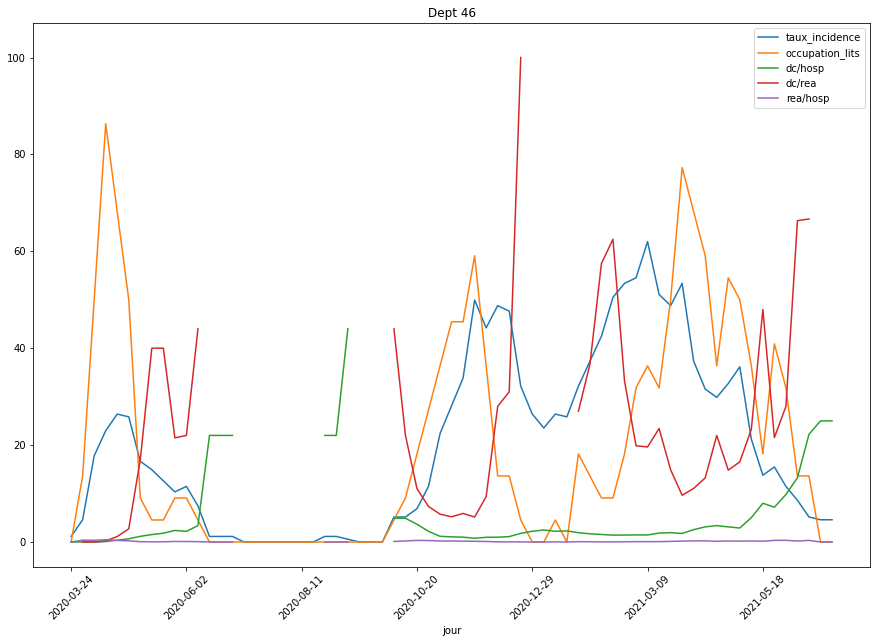

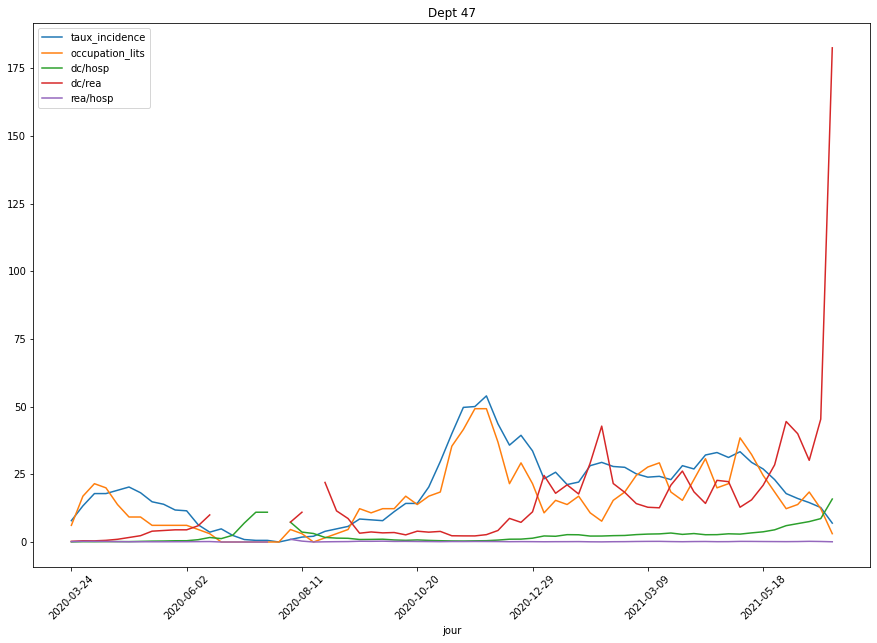

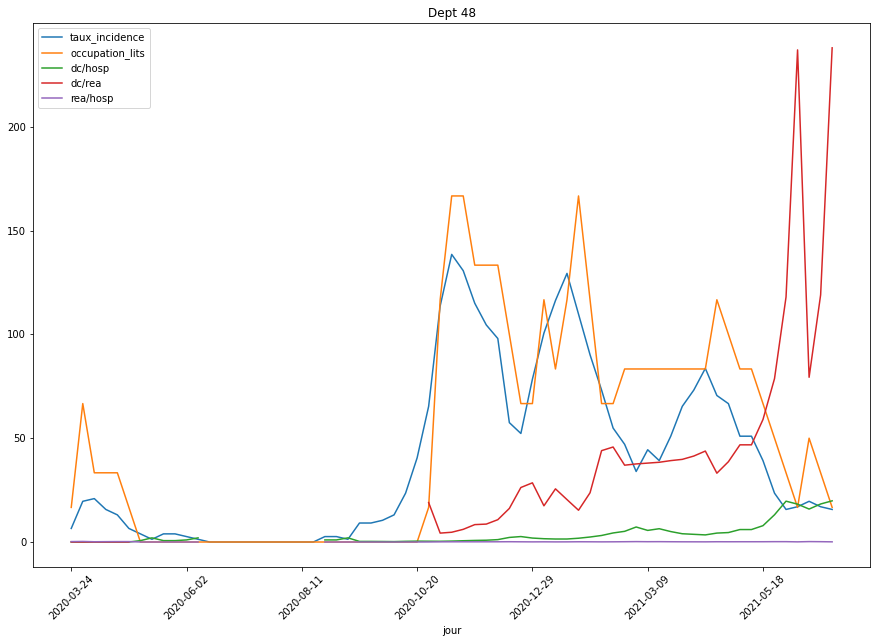

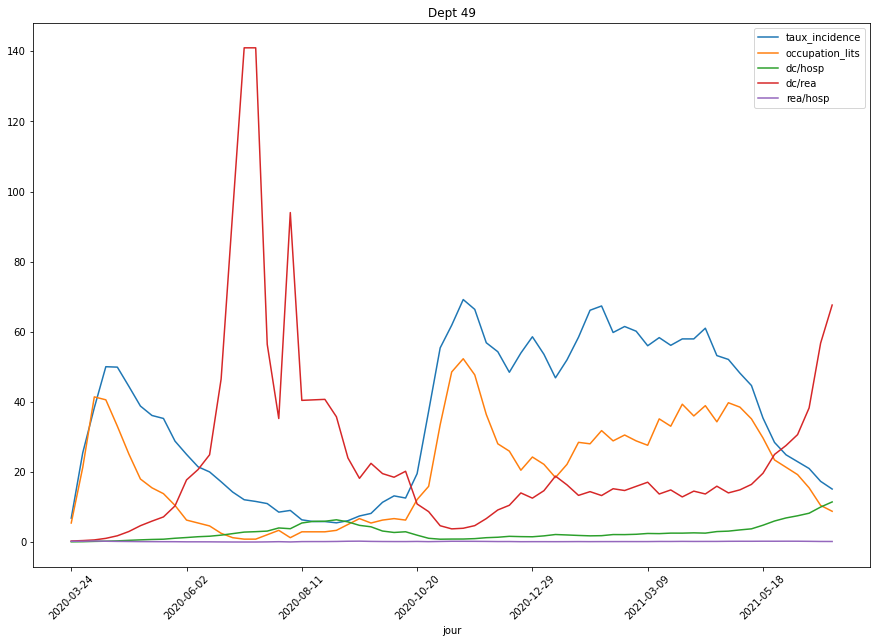

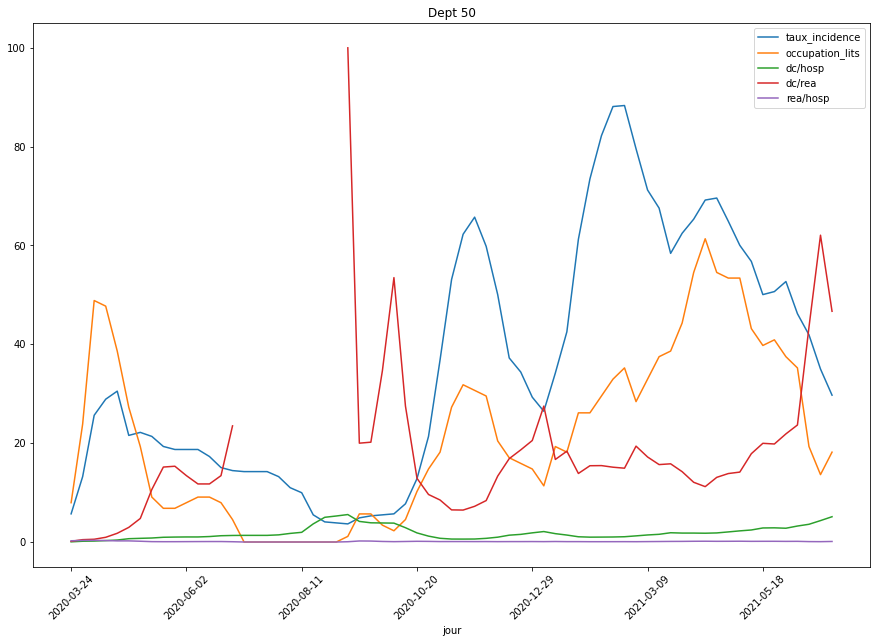

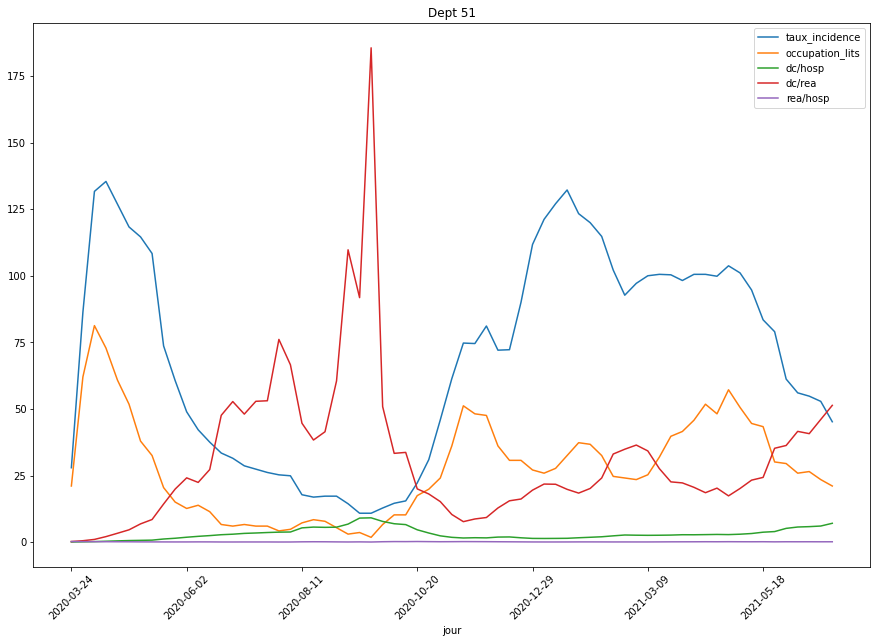

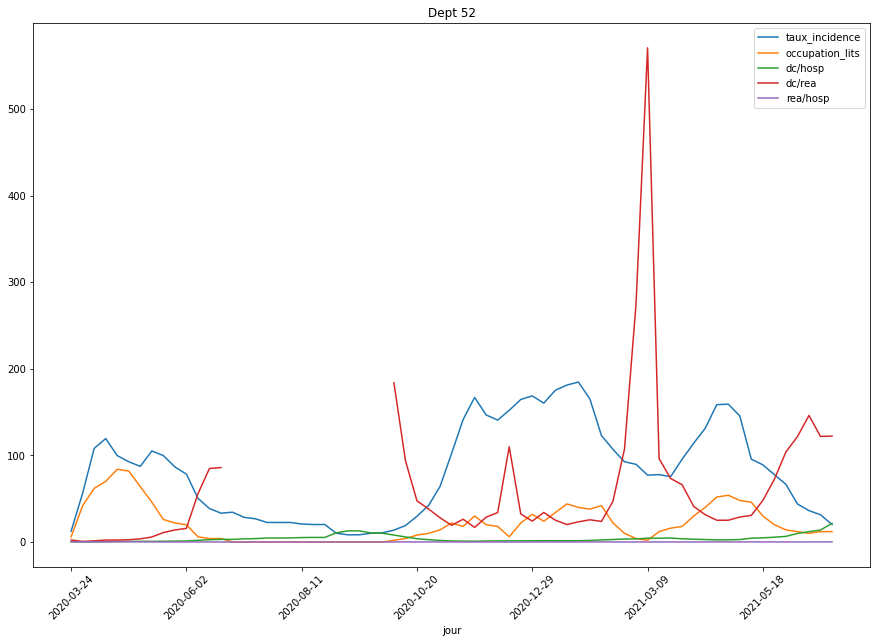

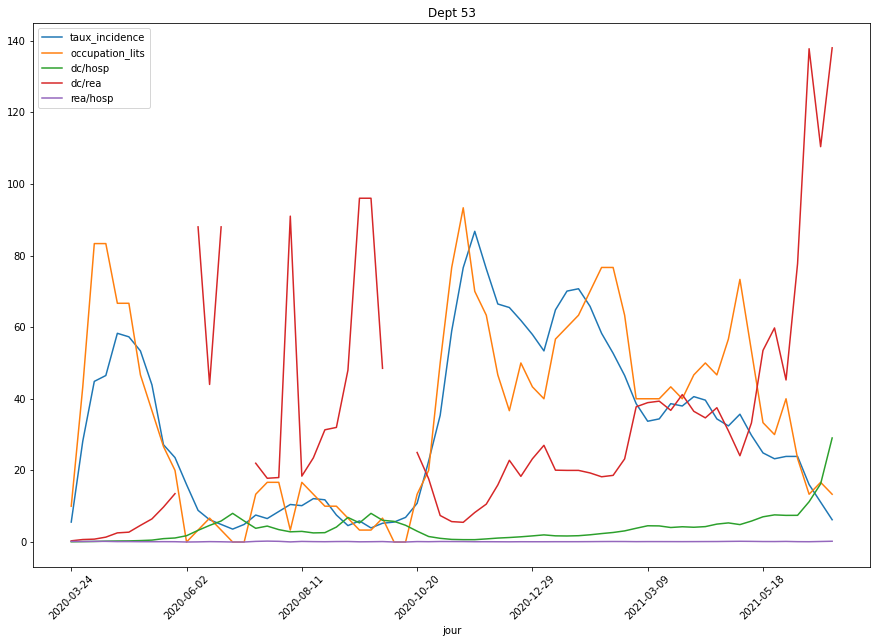

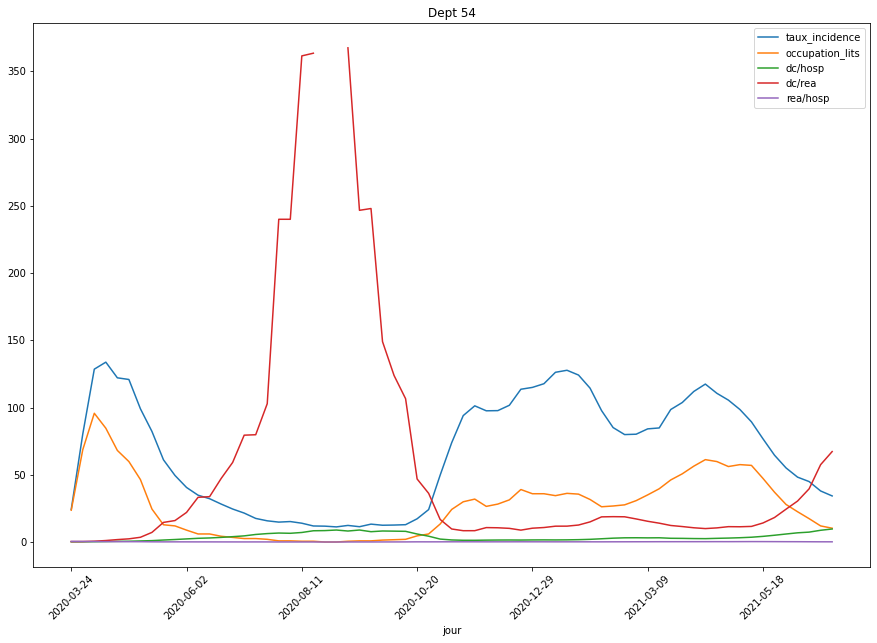

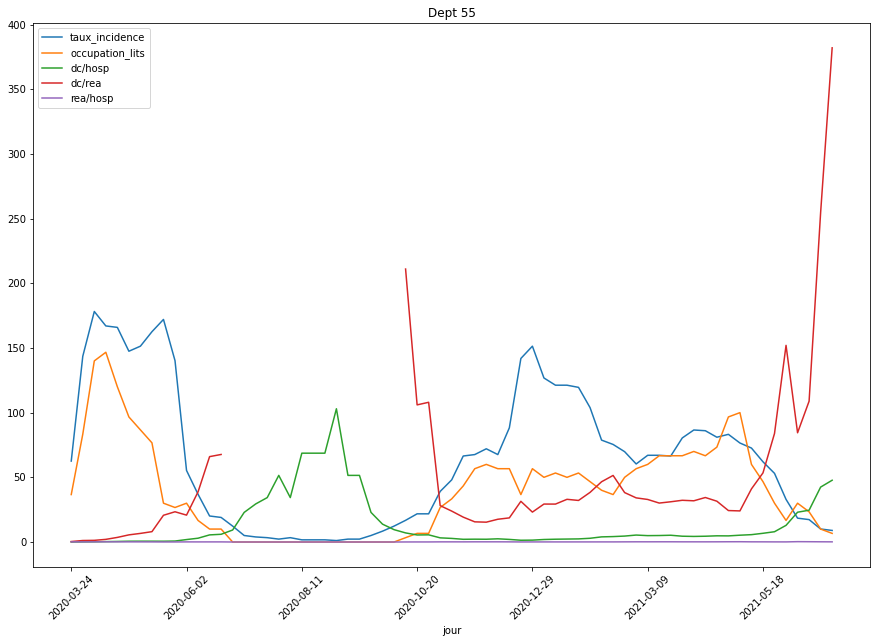

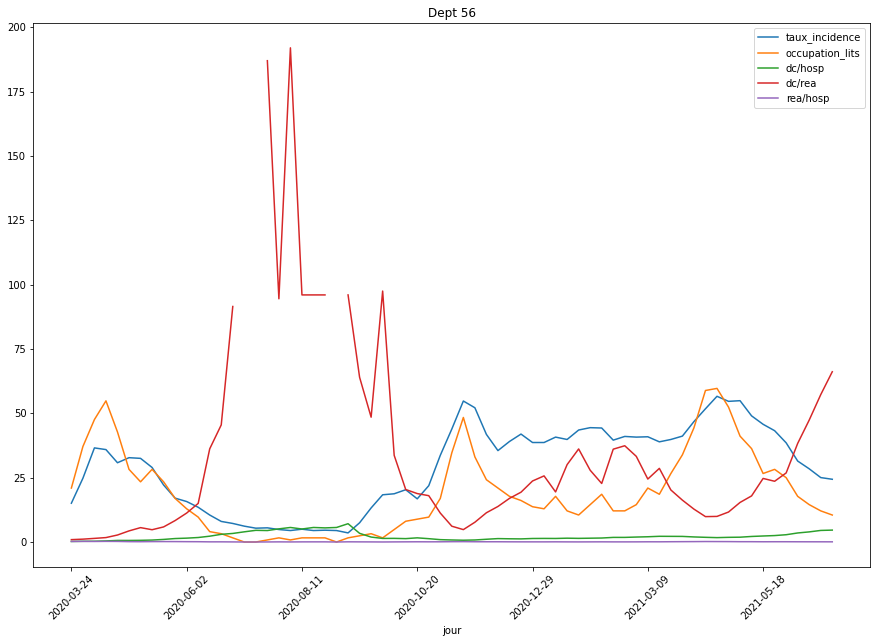

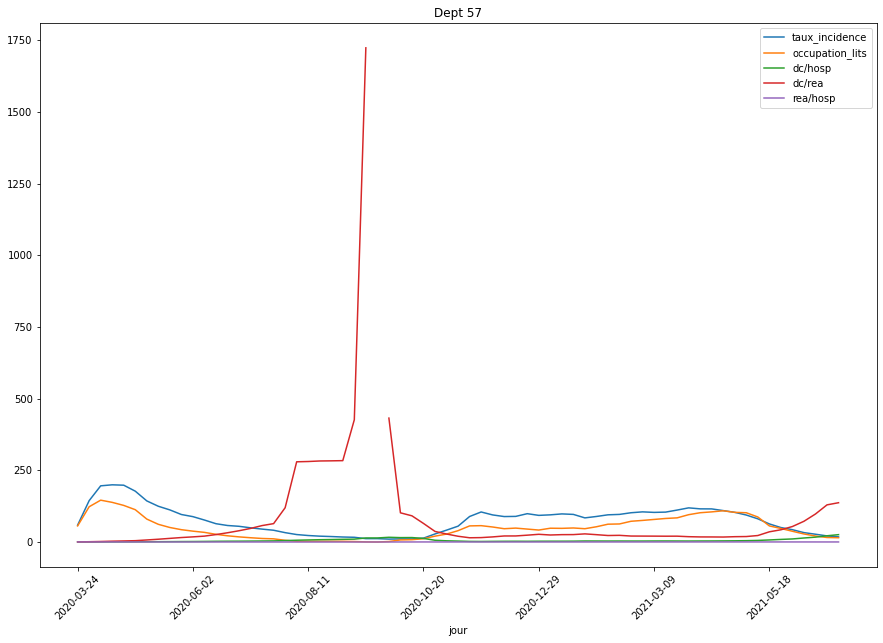

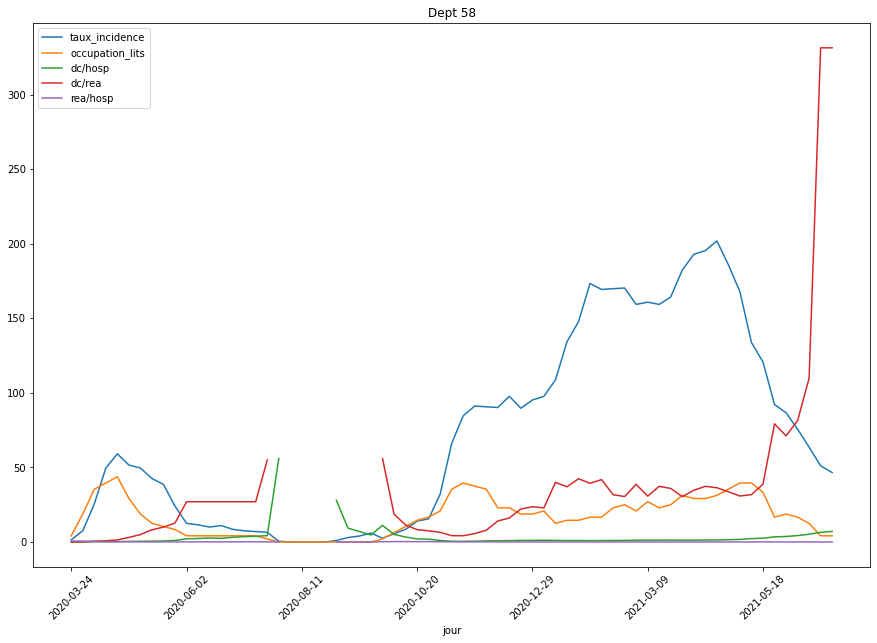

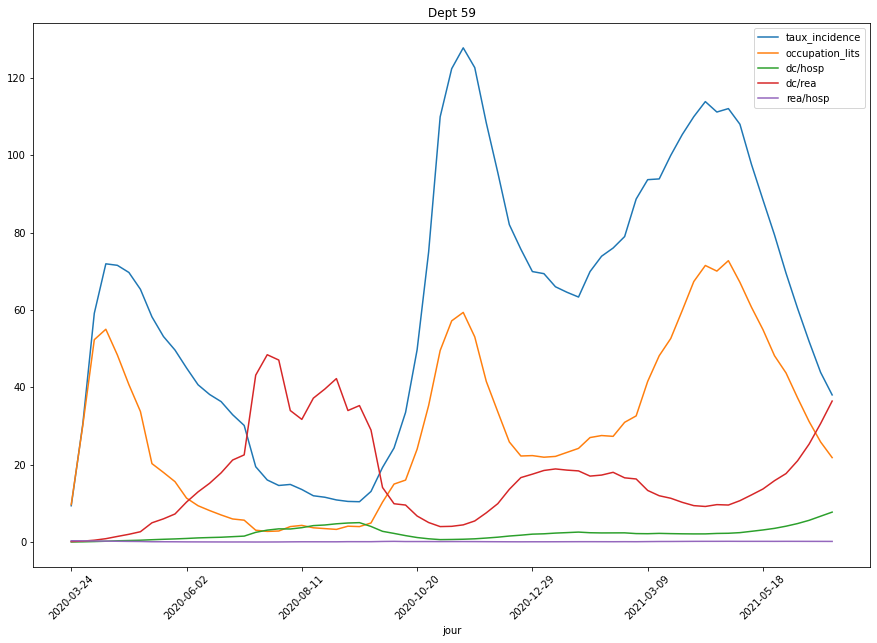

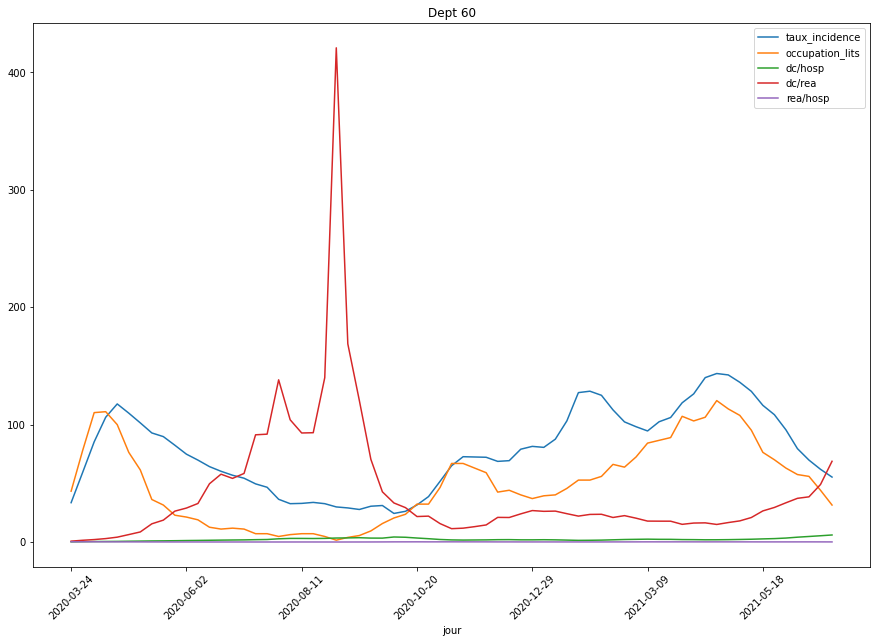

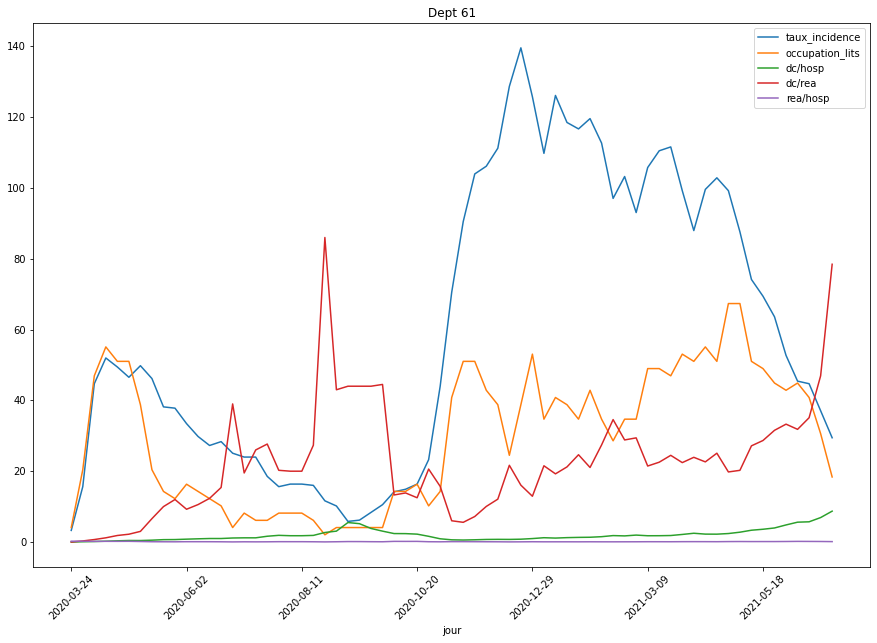

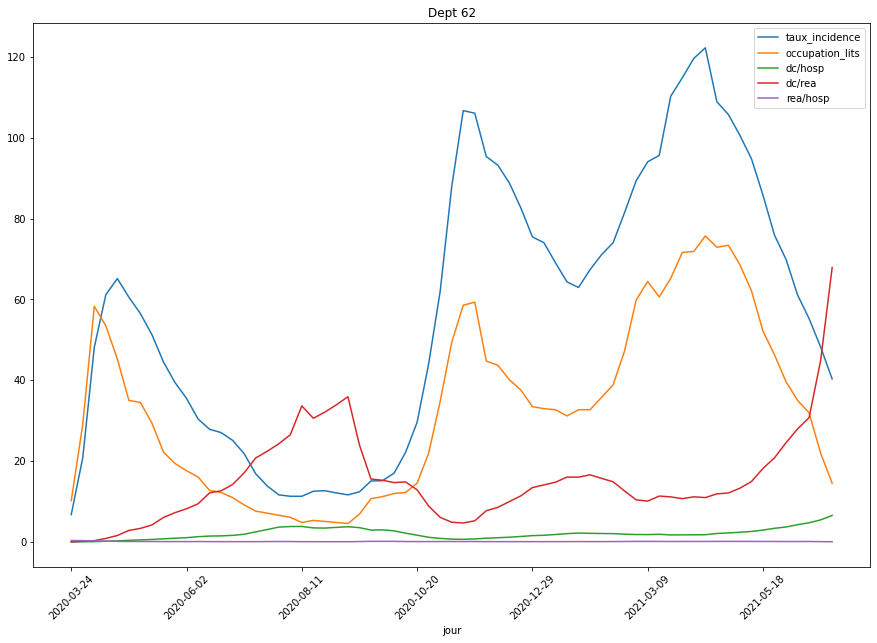

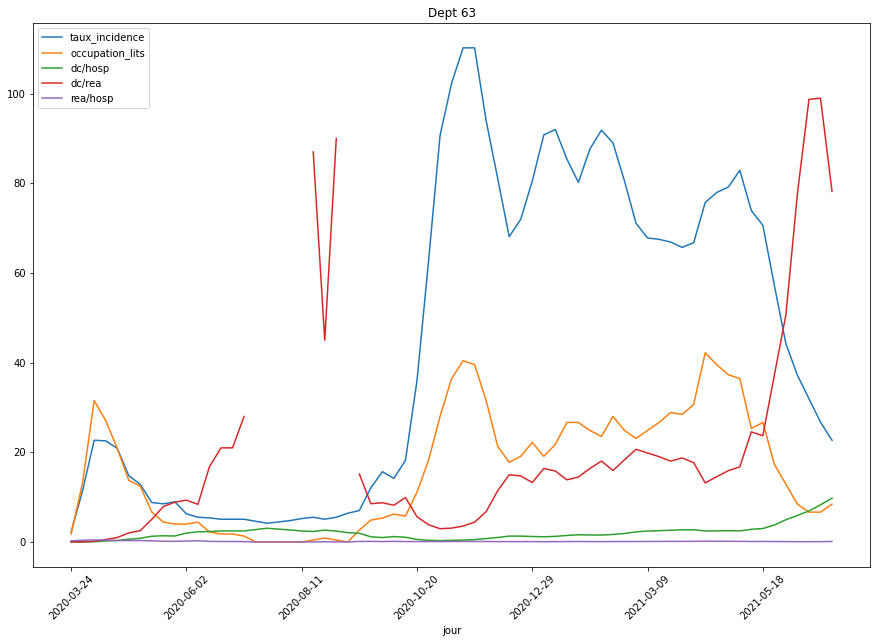

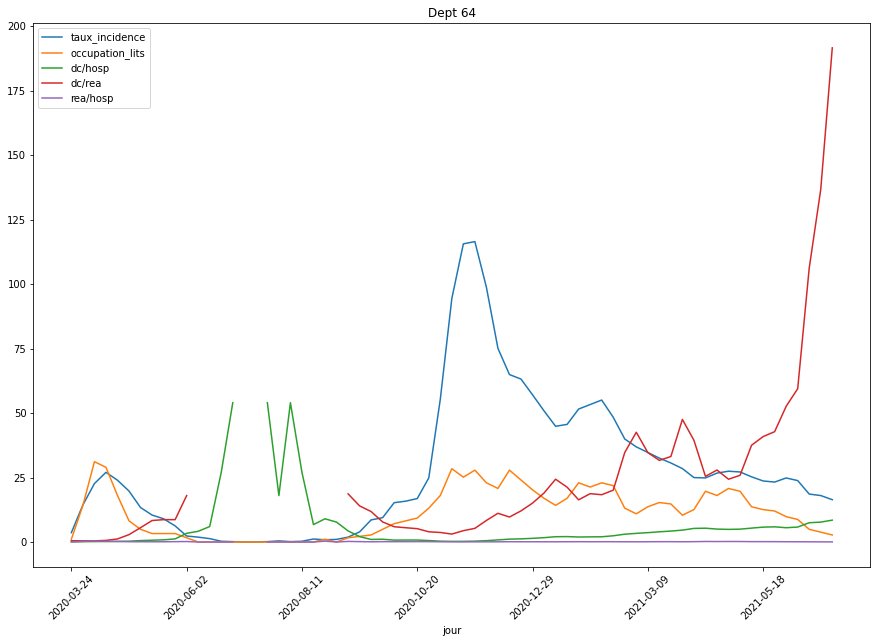

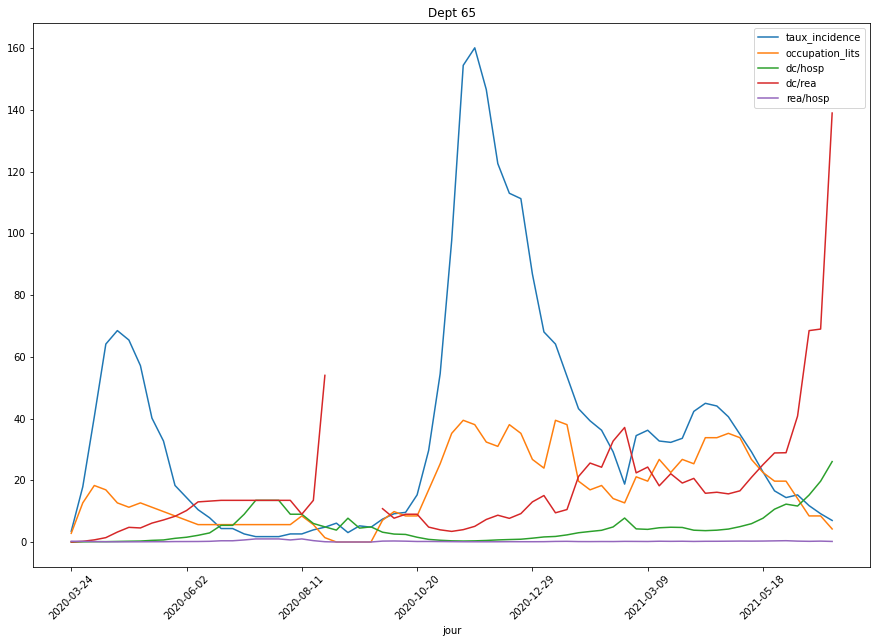

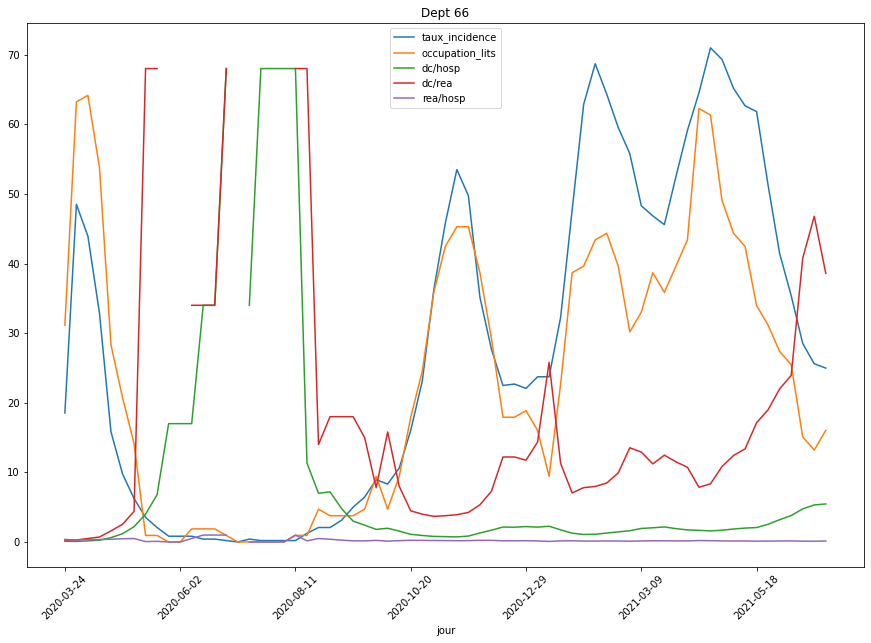

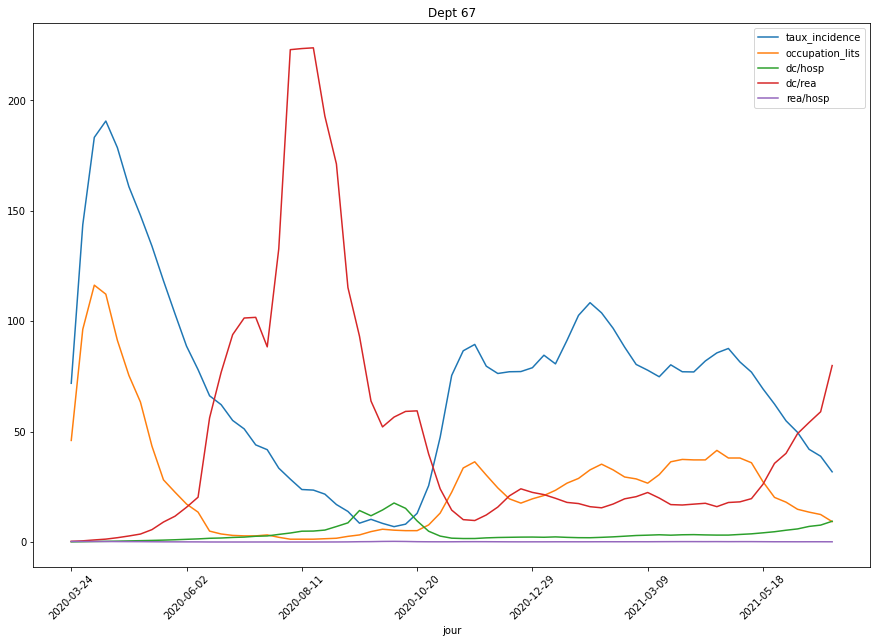

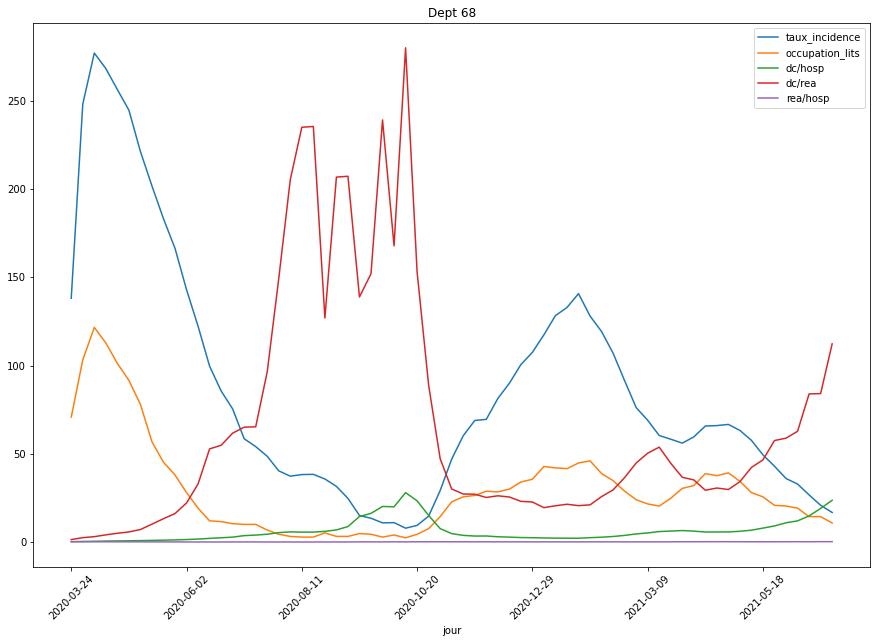

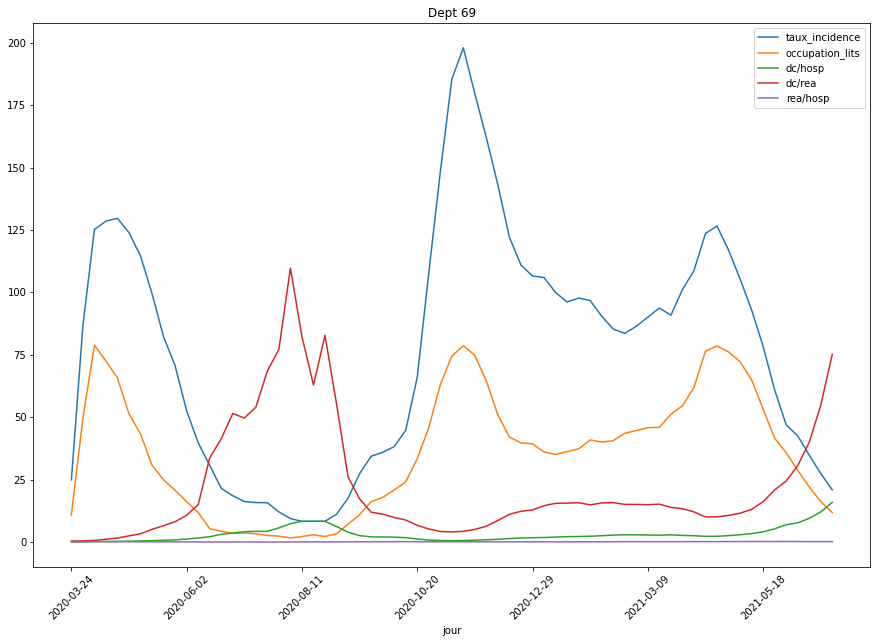

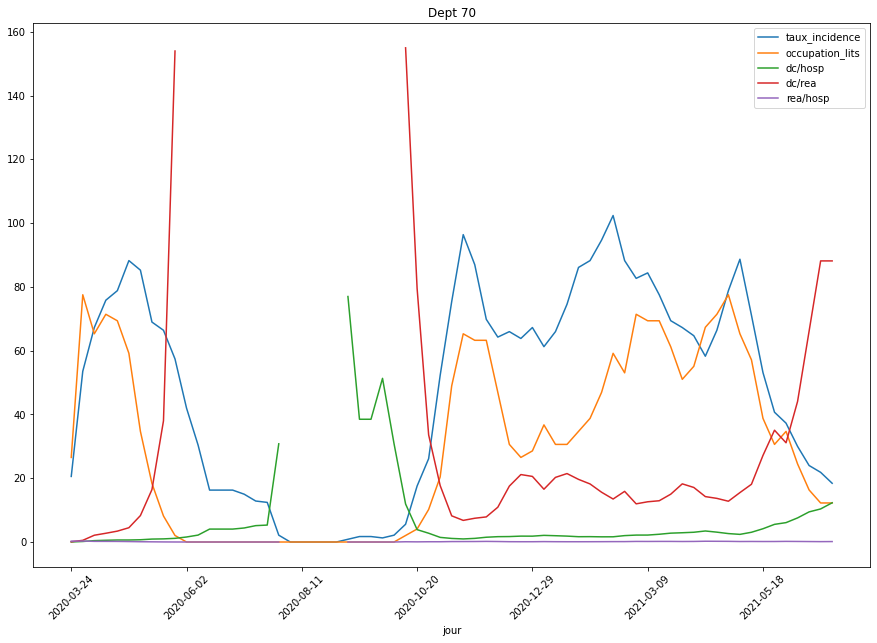

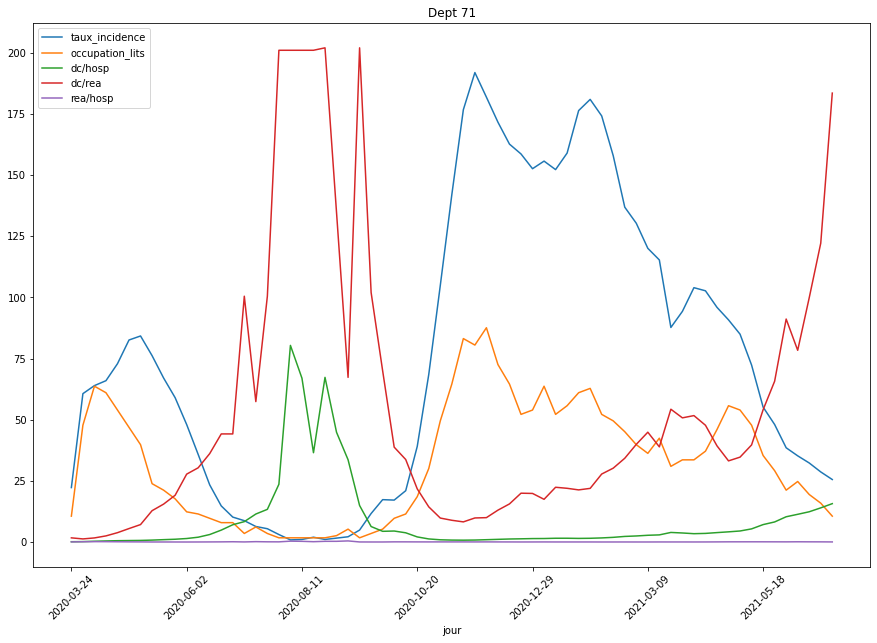

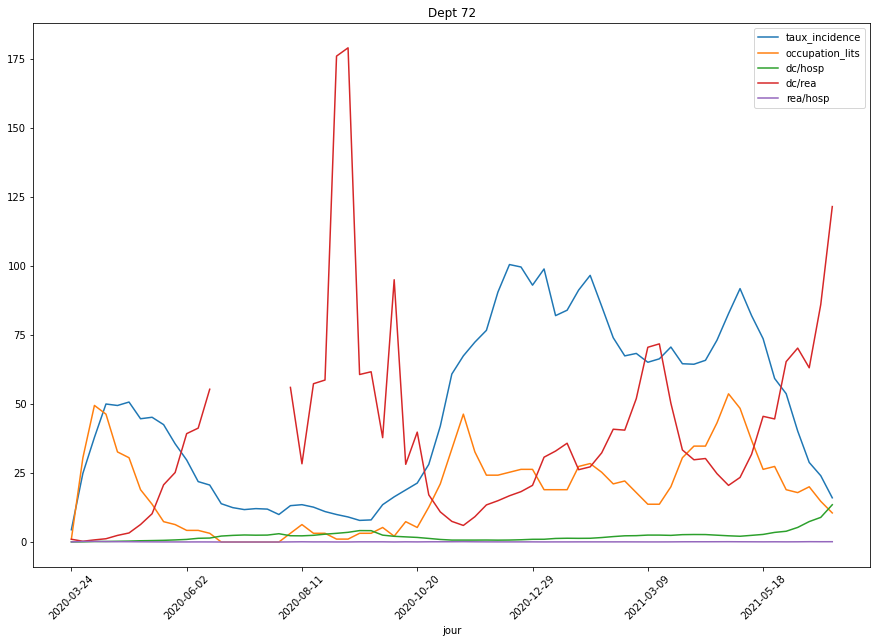

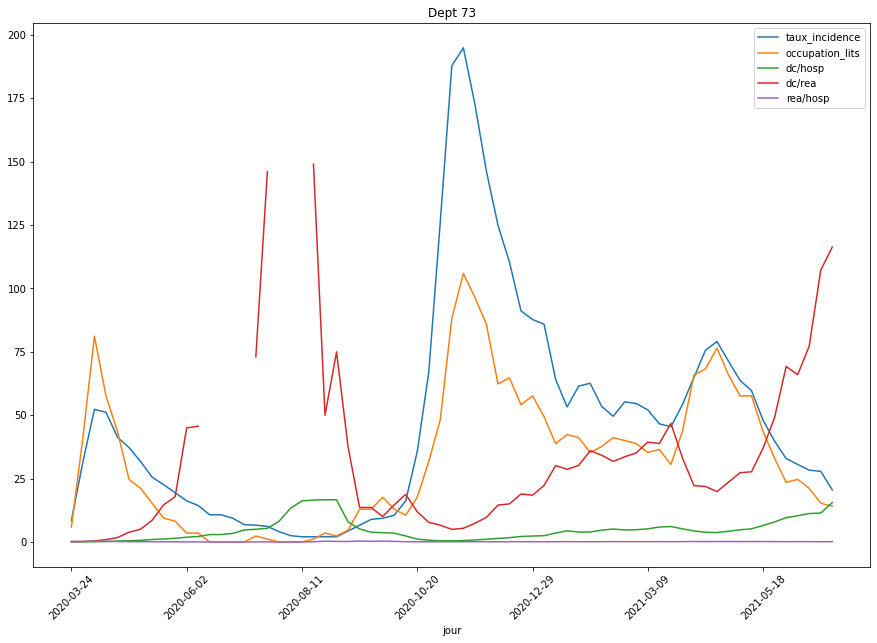

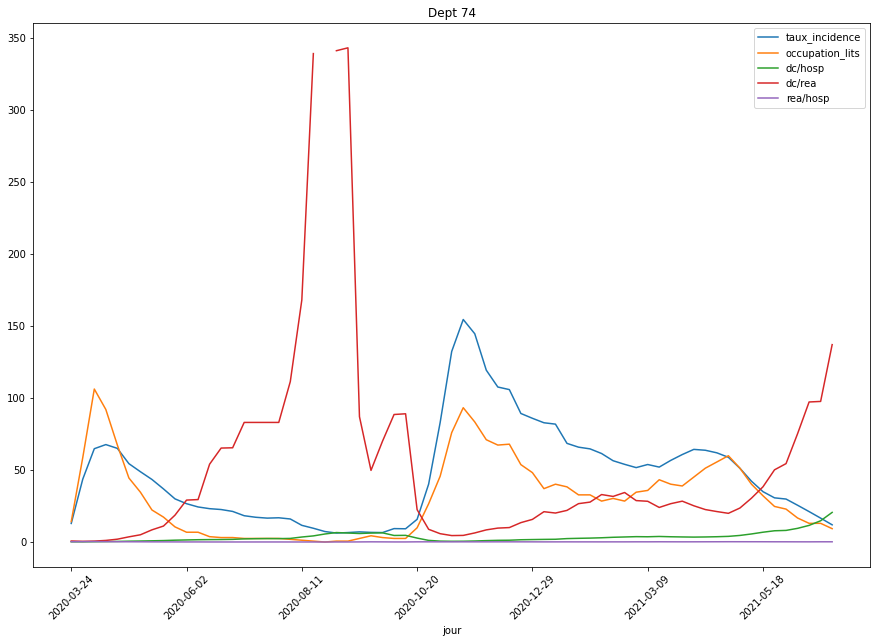

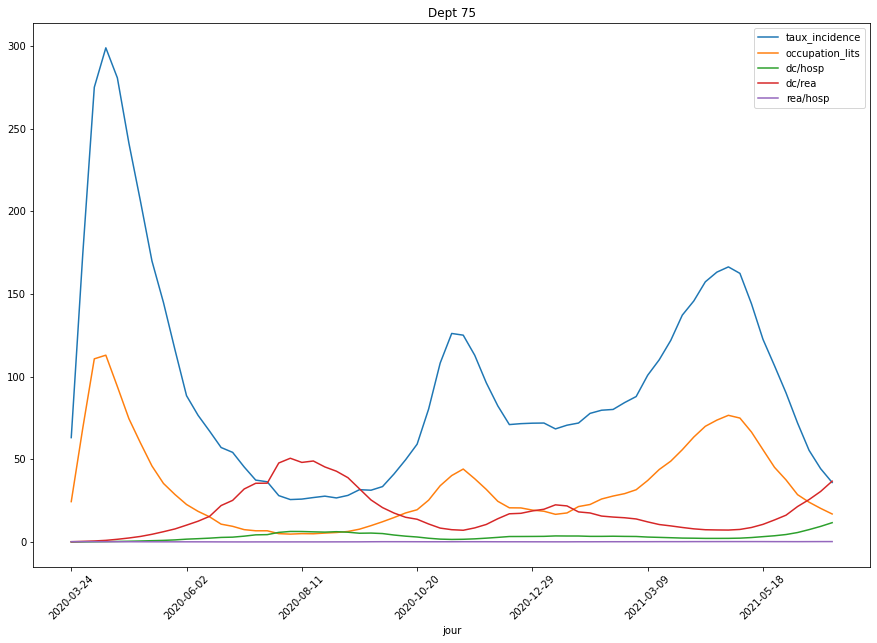

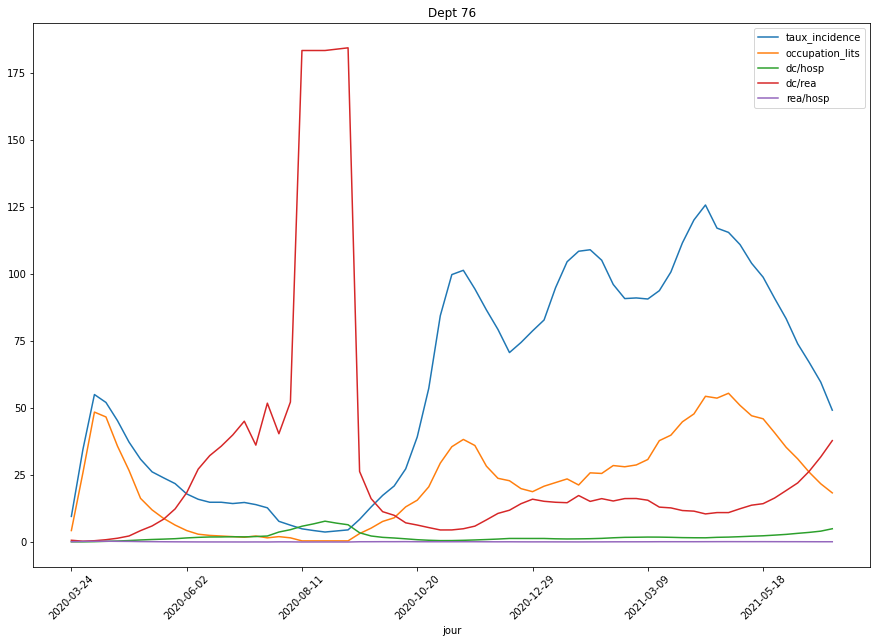

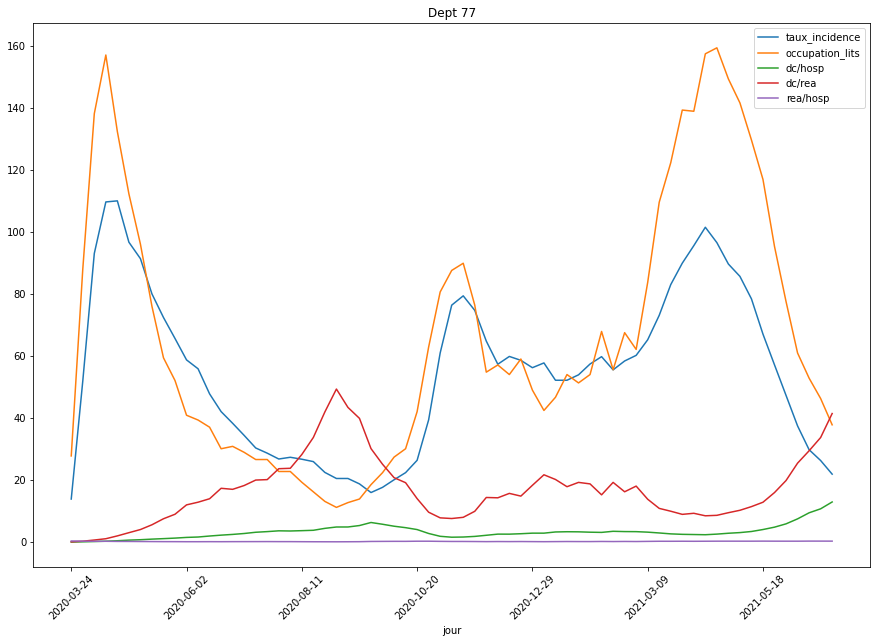

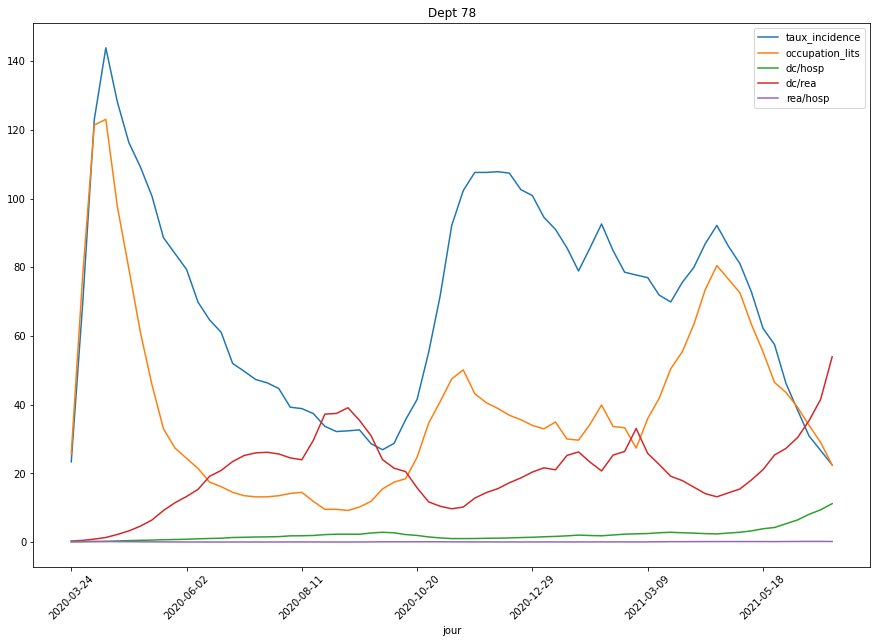

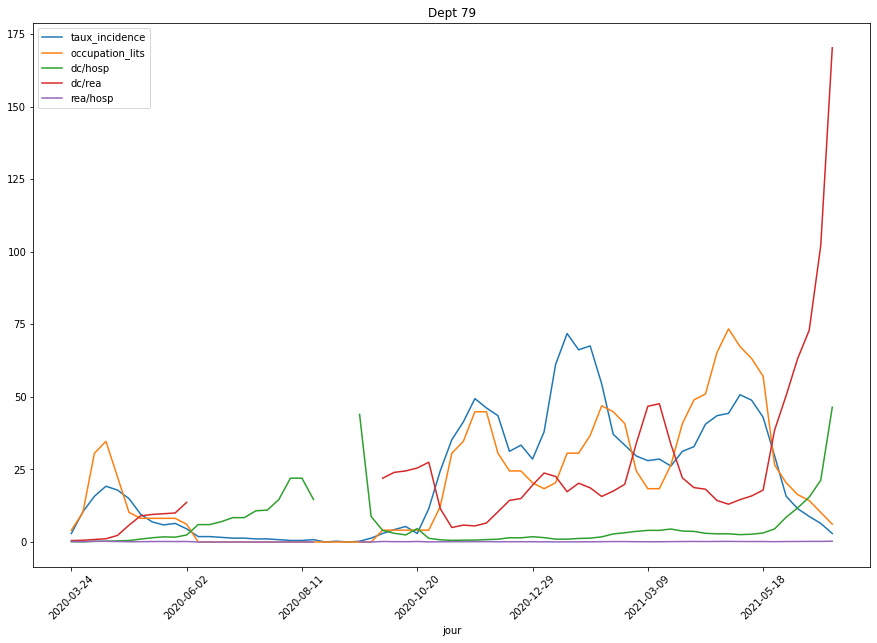

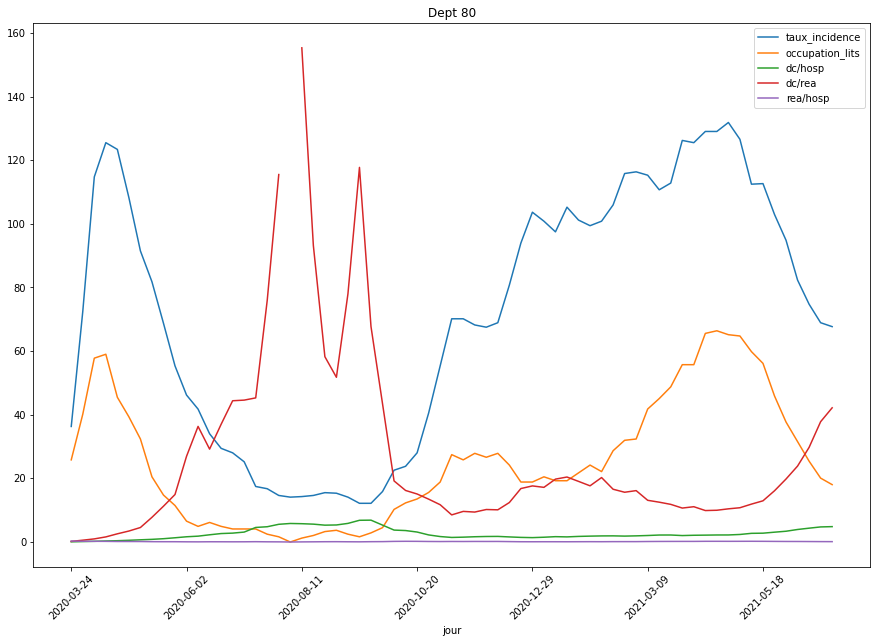

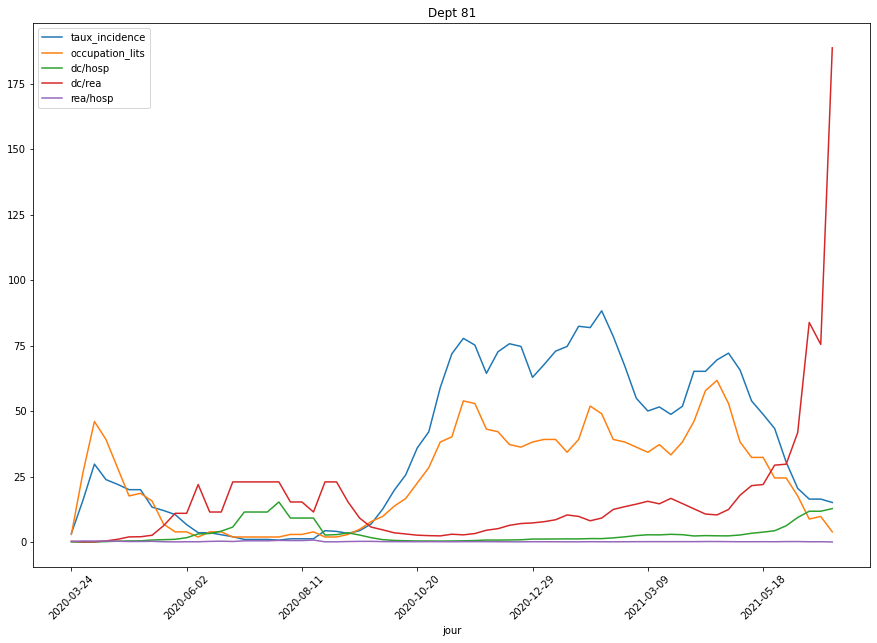

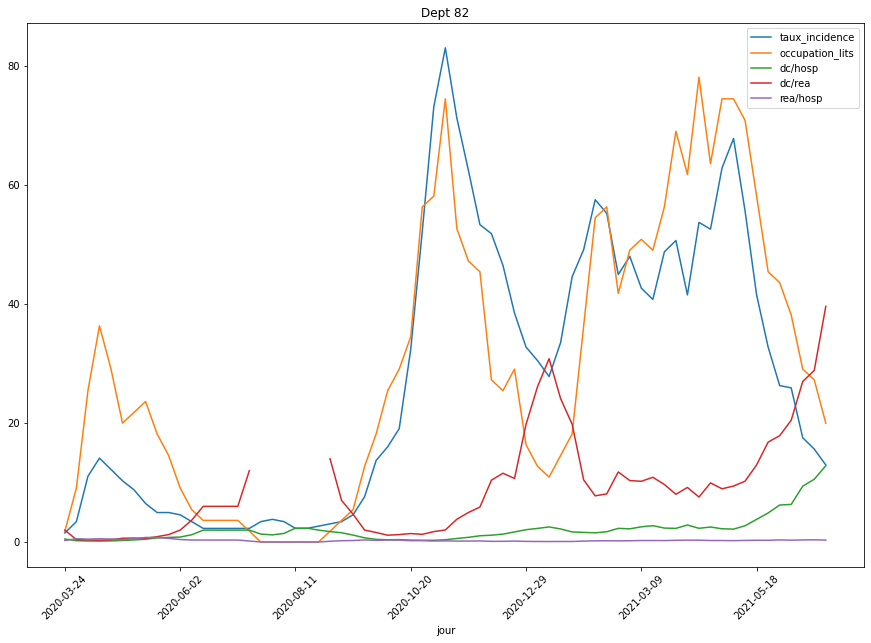

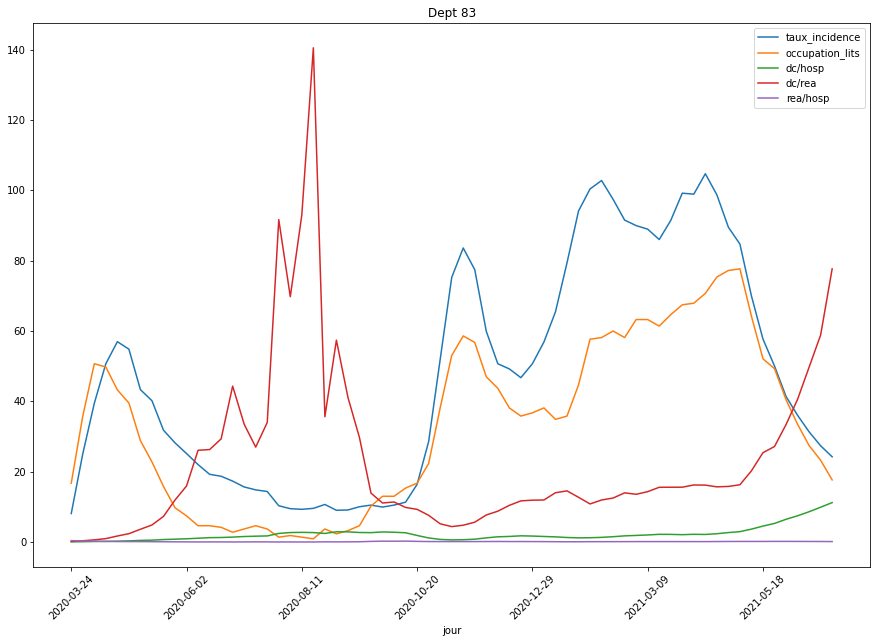

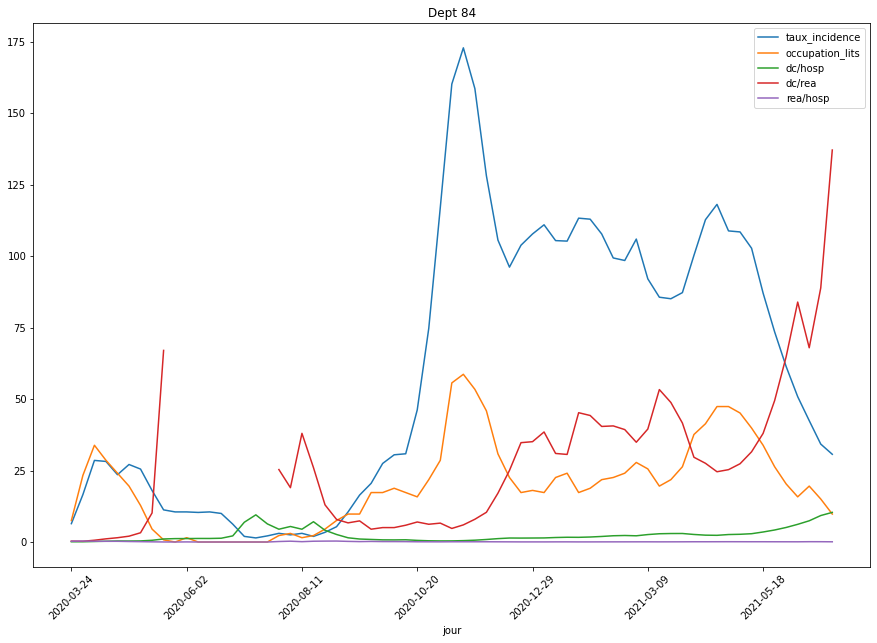

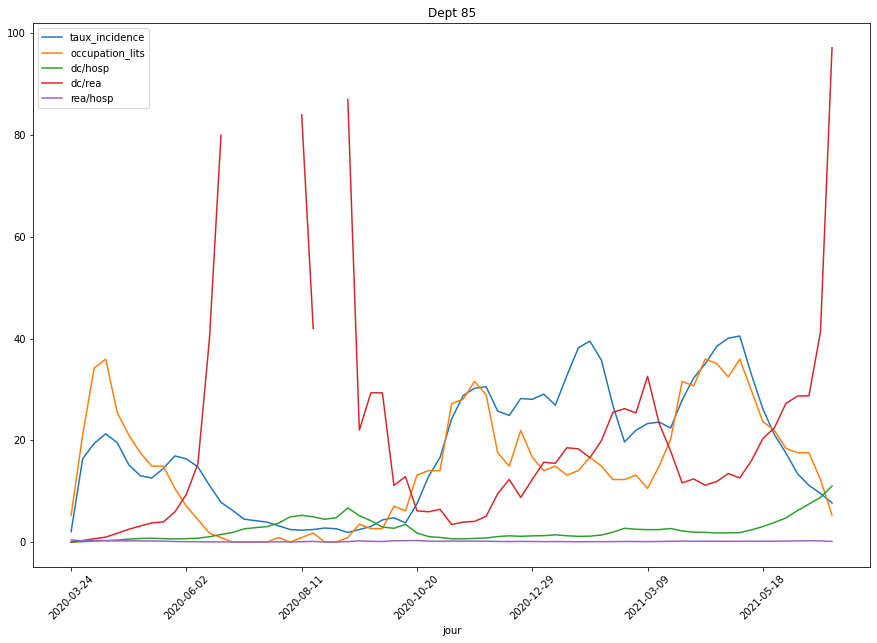

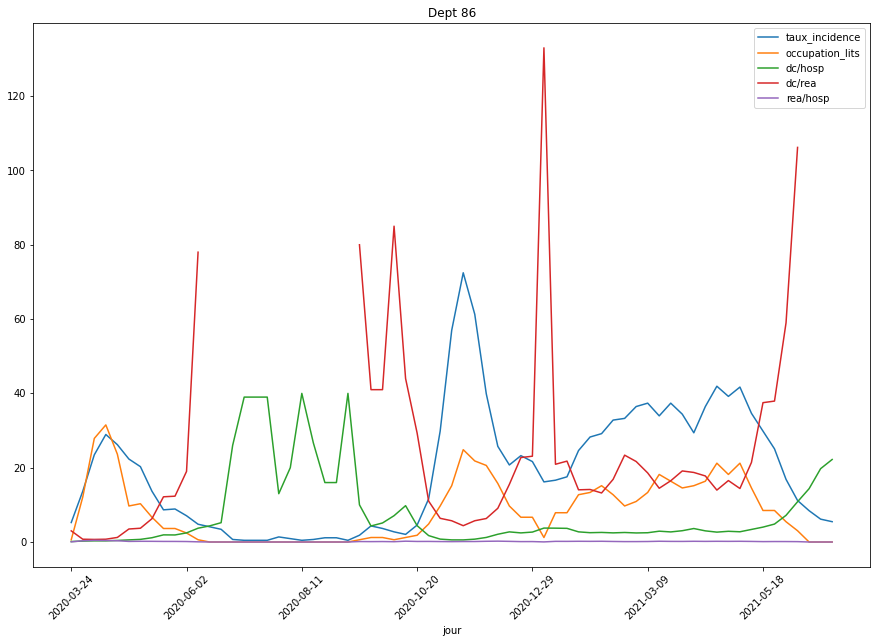

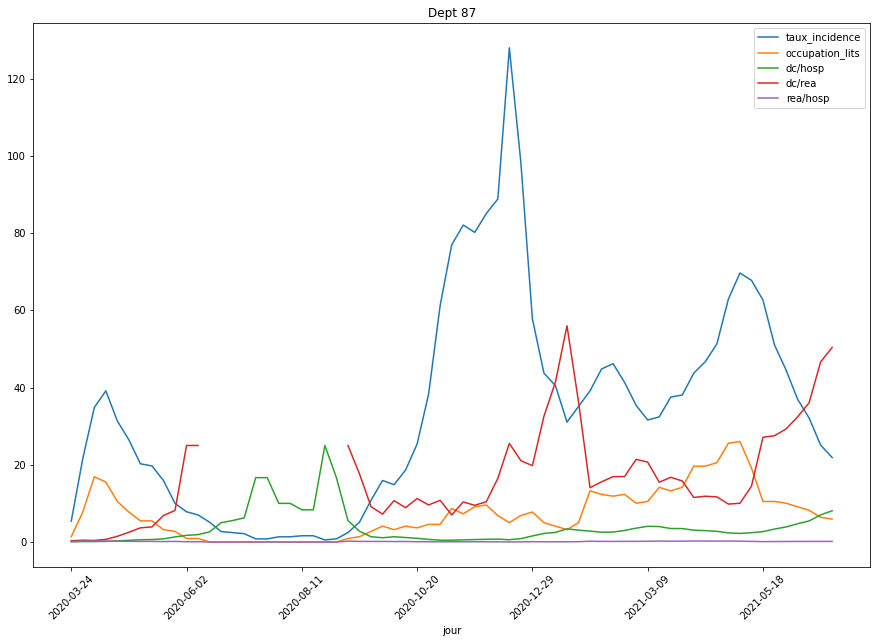

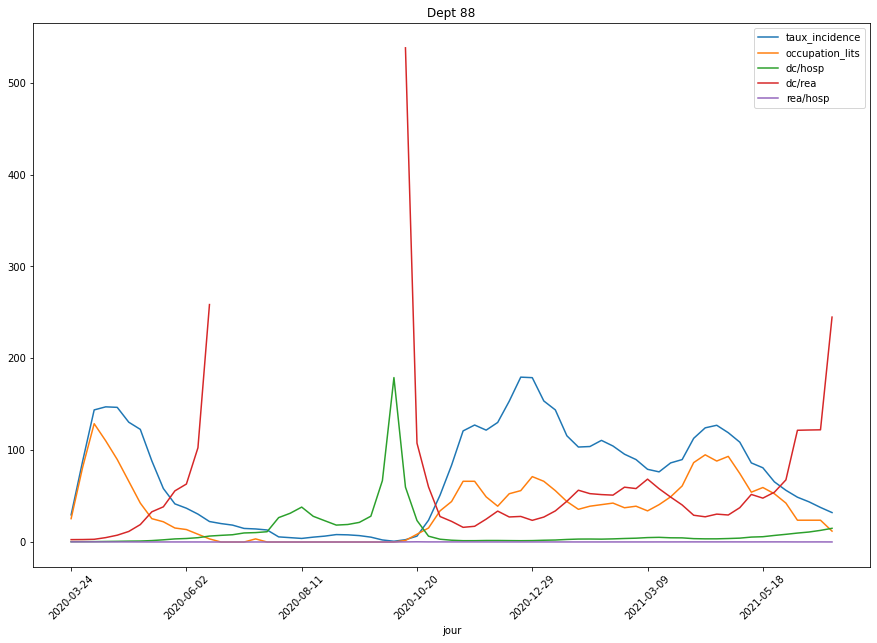

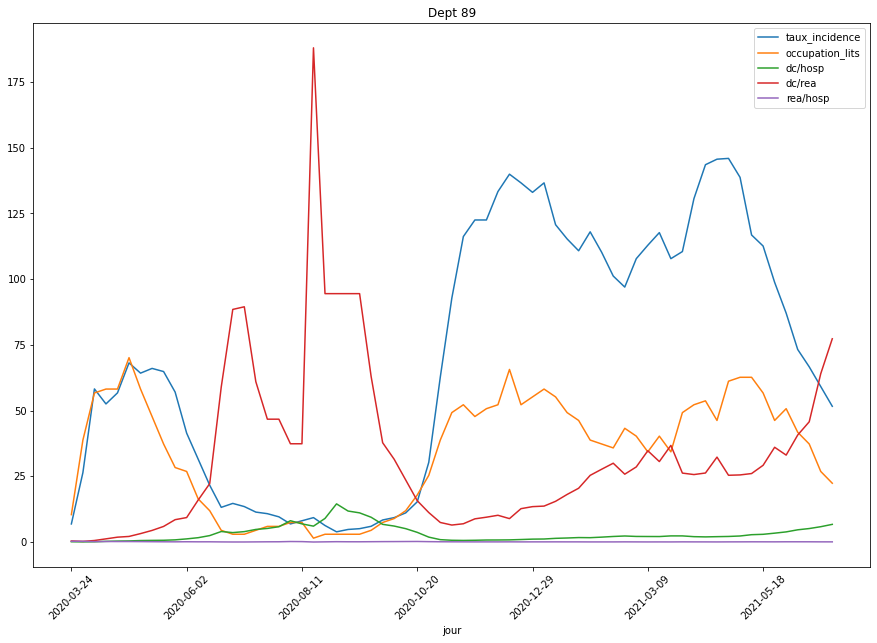

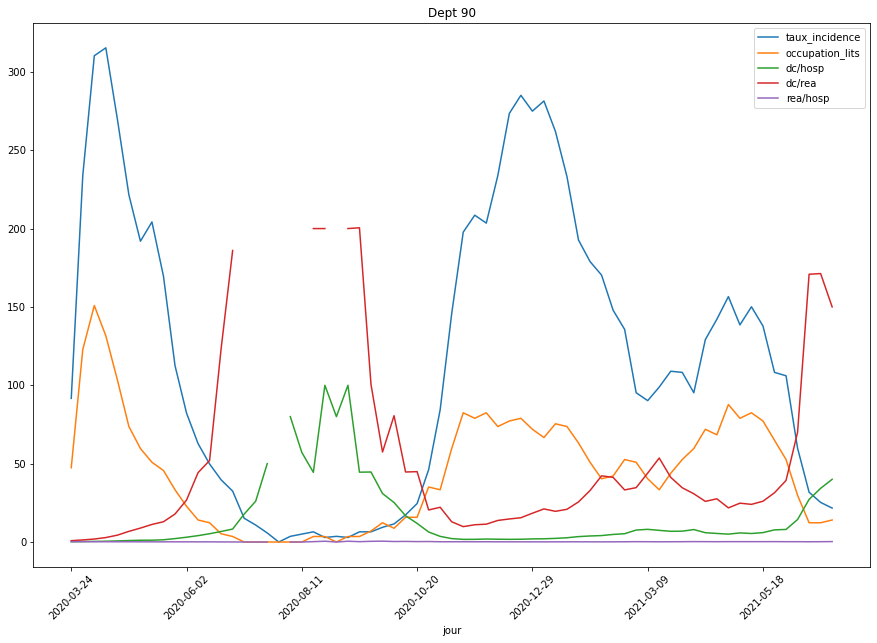

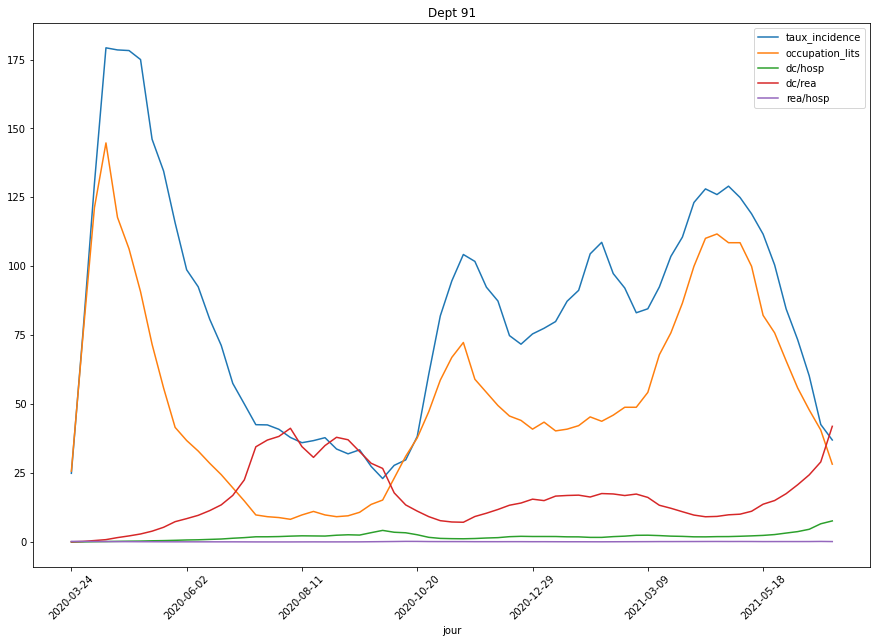

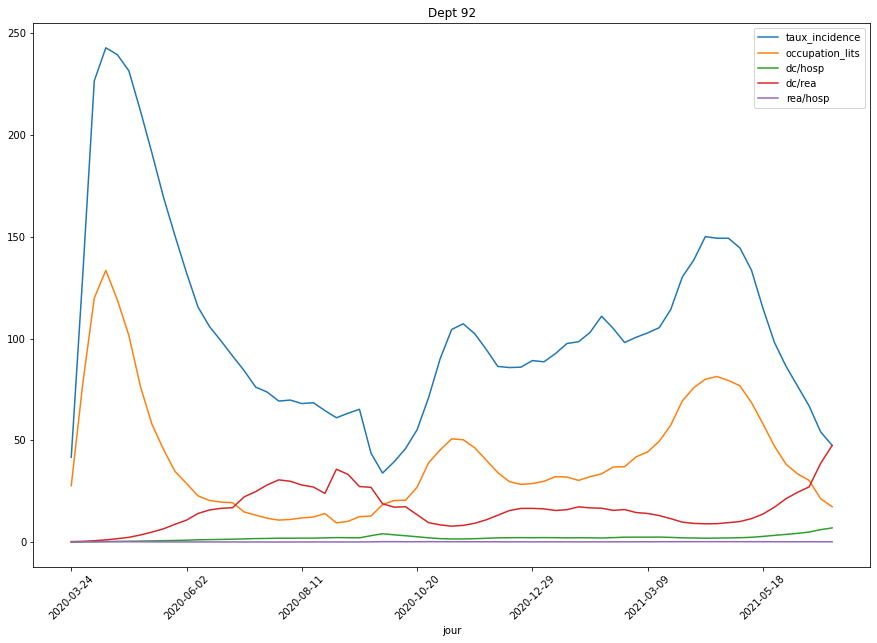

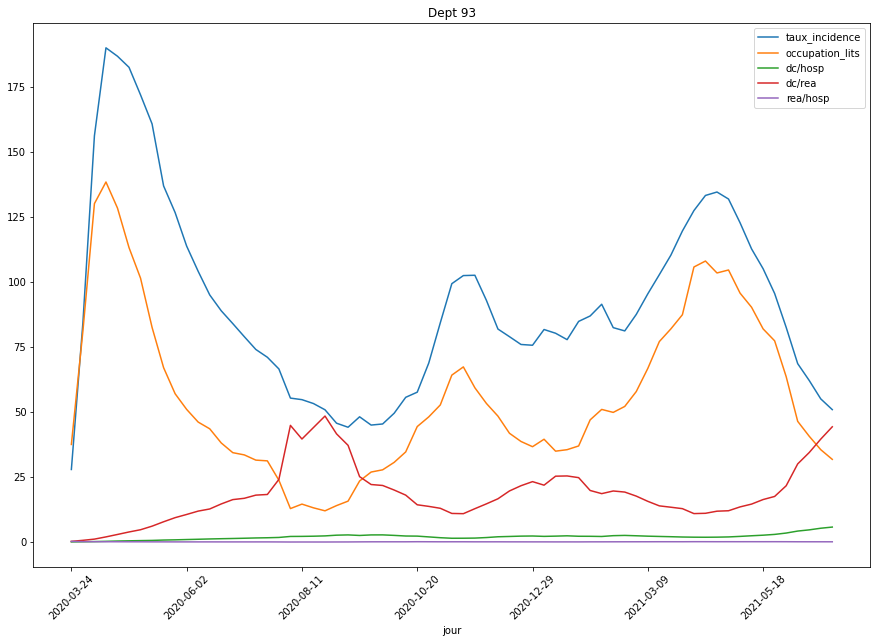

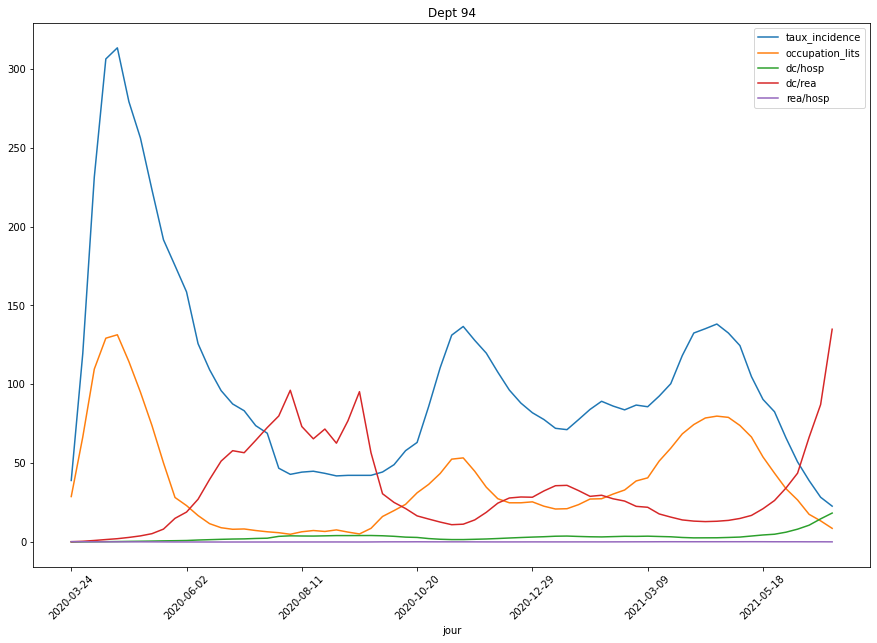

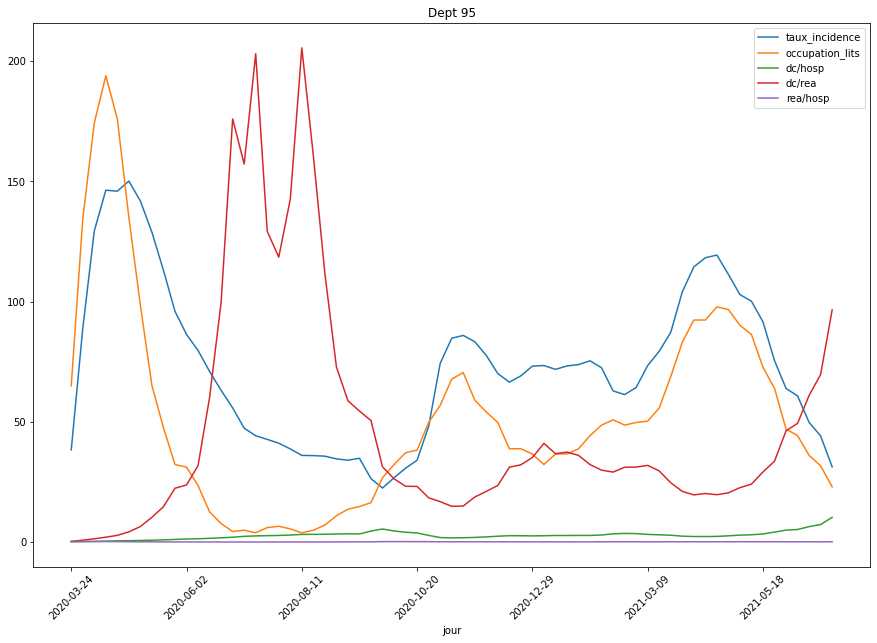

In [109]:
groups = df.groupby('dep')
for gr in groups:
    dep = str(gr[0])
    test = gr[-1].set_index('jour').drop(columns='dep')
    
    test.plot(rot=45, title='Dept {}'.format(dep), figsize=(15,10))
    plt.show()